# Importing Libraries

In [94]:
import numpy as np
import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt

# Defining functions for Pattern Recognition

Ascending Triangle Pattern

In [95]:

def ascending_triangle_pattern(data):
    pattern = (data['High'].rolling(window=3).max() <= data['High']) & (data['Low'].rolling(window=3).min() >= data['Low'])
    asc_tri_pat_indices= np.where(pattern)
    return asc_tri_pat_indices

Bear Flag Pattern

In [96]:
def bear_flag(data):
    bear_flag_pattern = (data['High'] < data['High'].shift()) & (data['Low'] > data['Low'].shift()) & (data['Close'] < data['Close'].shift())
    bear_flag_indices = np.where(bear_flag_pattern)[0]
    return bear_flag_indices

Cup & Handle Pattern

In [97]:
def cup_and_handle(data):
    sma50 = talib.SMA(data['Close'], timeperiod=50)
    sma200 = talib.SMA(data['Close'], timeperiod=200)
    # Identify Cup and Handle pattern
    cup_handle_pattern = (data['Close'] > sma50) & (sma50 > sma200) & (data['Close'].rolling(window=50, center=True).max() == data['Close'])
    # Get the indices where Cup and Handle pattern occurs
    cup_handle_indices = np.where(cup_handle_pattern)[0]
    return cup_handle_indices

Rounding Top

In [98]:
def rounding_top(data):
    # Calculate the Simple Moving Average (SMA)
    sma = talib.SMA(data['Close'], timeperiod=20)
    # Calculate the Rate of Change (ROC)
    roc = talib.ROC(data['Close'], timeperiod=10)
    # Define the rounding top pattern criteria
    rounding_top_criteria = (roc > 0) & (roc.shift(1) > 0) & (roc.shift(-1) > 0)
    # Get the indices where rounding top pattern occurs
    rounding_top_indices = np.where(rounding_top_criteria)[0]
    rounded_top_data = pd.DataFrame(index=data.index, columns=['Pattern'])
    rounded_top_data['Pattern'] = rounding_top_criteria.astype(int)
    return rounding_top_indices



Head & Shoulders

In [99]:
def head_and_shoulders(data):
    peaks = (data['High'].shift(-1) < data['High']) & (data['High'].shift(1) < data['High'])
    valleys = (data['Low'].shift(-1) > data['Low']) & (data['Low'].shift(1) > data['Low'])
    # Find the left shoulder, head, and right shoulder
    left_shoulder = (peaks.shift(1) & valleys) | (peaks & valleys.shift(1))
    head = peaks
    right_shoulder = (peaks.shift(-1) & valleys) | (peaks & valleys.shift(-1))
    # Combine the patterns to identify the Head and Shoulders pattern
    head_and_shoulders = left_shoulder & head.shift(-1) & right_shoulder.shift(-2)
    # Return the indices where the Head and Shoulders pattern occurs
    pattern_indices = np.where(head_and_shoulders)[0]

    return pattern_indices

In [100]:
Tickers = ['AAPL','MSFT','AMZN','TSLA','META','NFLX','NVDA','BABA','PYPL','INTC']
stocks = [yf.download(i,start='2010-01-01') for i in Tickers]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Ascending Triangle Pattern

The ascending triangle indices of AAPL are 
 DatetimeIndex(['2010-01-11', '2010-02-11', '2010-03-22', '2010-04-01',
               '2010-06-21', '2010-11-09', '2010-12-20', '2011-02-10',
               '2011-03-07', '2011-04-01', '2011-05-11', '2011-08-31',
               '2011-10-31', '2011-12-13', '2012-02-15', '2012-09-10',
               '2013-02-25', '2013-07-09', '2013-10-29', '2013-12-11',
               '2014-01-09', '2014-03-13', '2014-05-16', '2014-06-09',
               '2014-06-20', '2014-07-16', '2014-08-07', '2014-08-27',
               '2014-09-09', '2014-09-19', '2014-10-08', '2014-11-11',
               '2014-12-26', '2015-03-09', '2015-09-24', '2016-01-13',
               '2016-02-03', '2016-03-10', '2016-03-29', '2016-06-09',
               '2016-07-21', '2016-09-19', '2017-03-21', '2017-07-27',
               '2017-12-11', '2018-09-05', '2018-10-16', '2018-10-24',
               '2019-03-20', '2019-07-19', '2019-07-25', '2019-09-09',
               '2019-10-29', '20

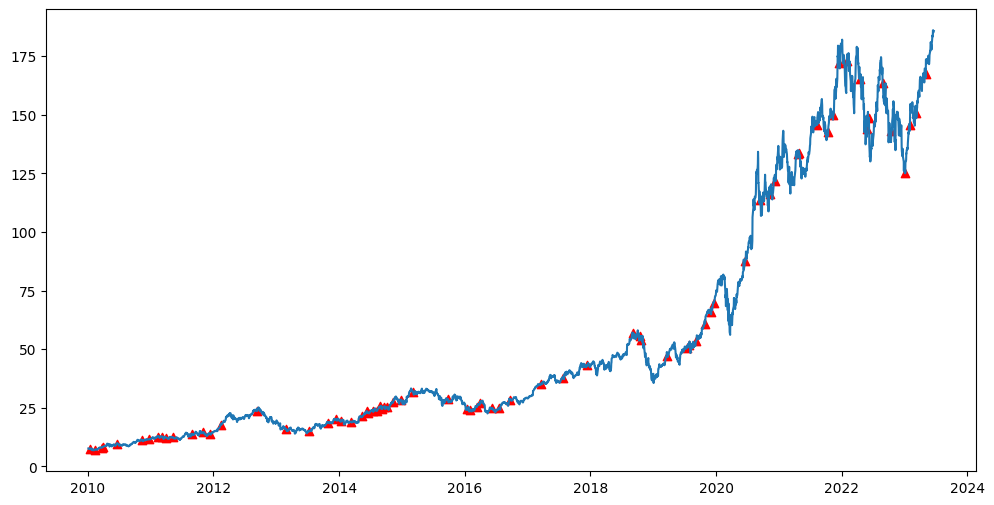

The ascending triangle indices of MSFT are 
 DatetimeIndex(['2010-01-28', '2010-01-29', '2010-02-11', '2010-03-02',
               '2010-03-19', '2010-04-22', '2010-04-23', '2010-06-21',
               '2010-07-16', '2010-07-29',
               ...
               '2021-11-04', '2021-12-16', '2022-02-24', '2022-08-25',
               '2022-08-26', '2022-09-21', '2022-09-27', '2022-10-13',
               '2023-04-06', '2023-05-23'],
              dtype='datetime64[ns]', name='Date', length=103, freq=None)


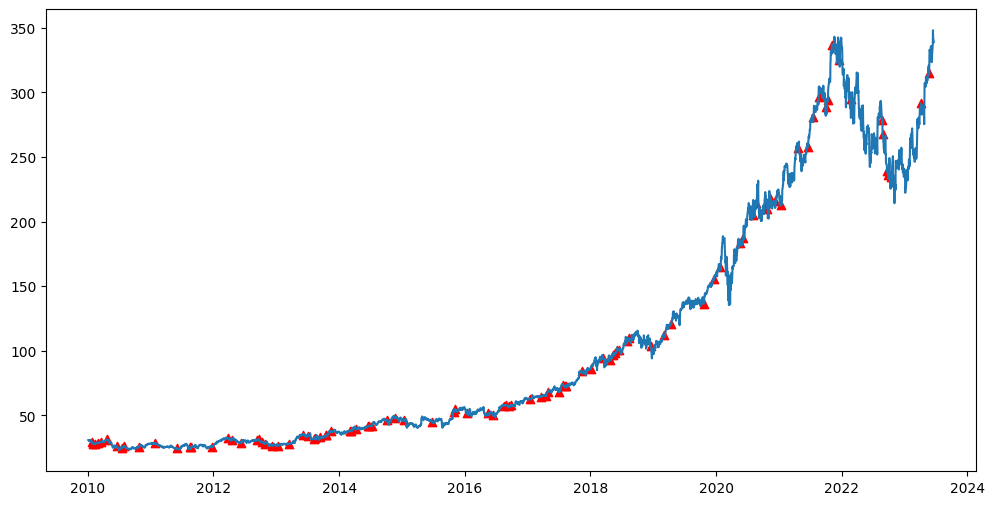

The ascending triangle indices of AMZN are 
 DatetimeIndex(['2010-03-18', '2010-03-19', '2010-05-18', '2010-09-08',
               '2010-10-12', '2010-12-29', '2011-01-07', '2011-03-23',
               '2011-04-26', '2011-05-12', '2011-08-01', '2011-08-26',
               '2011-12-21', '2012-03-06', '2012-06-04', '2012-06-21',
               '2012-09-04', '2012-12-31', '2013-03-12', '2013-05-07',
               '2013-07-26', '2013-08-19', '2013-10-03', '2013-10-17',
               '2013-11-13', '2013-12-18', '2013-12-27', '2014-03-19',
               '2014-08-07', '2014-09-02', '2015-01-02', '2015-01-29',
               '2015-03-18', '2015-08-06', '2015-09-25', '2015-11-30',
               '2015-12-08', '2016-04-28', '2016-09-15', '2016-10-04',
               '2017-01-23', '2017-03-21', '2017-06-26', '2017-10-18',
               '2018-03-27', '2018-04-13', '2018-05-23', '2018-06-18',
               '2018-06-19', '2018-09-11', '2018-12-19', '2019-04-22',
               '2019-04-26', '20

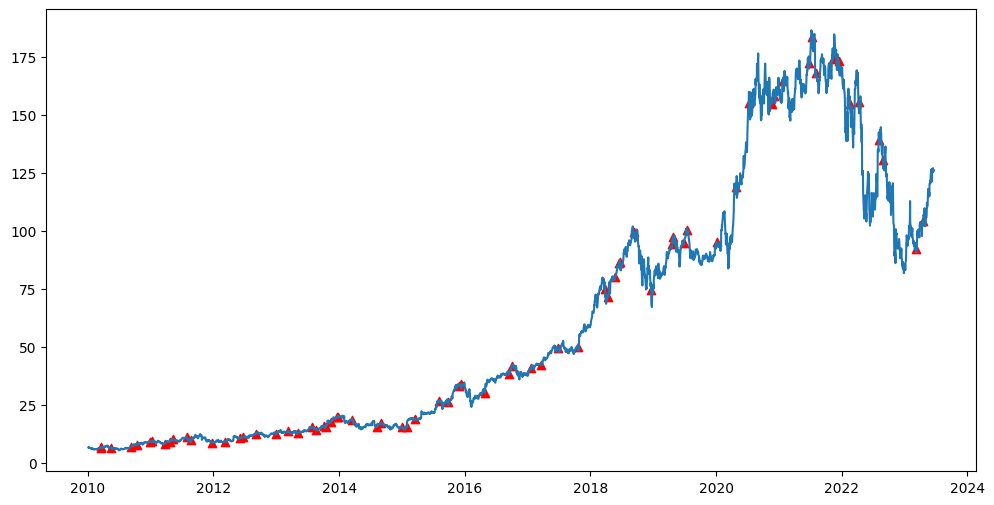

The ascending triangle indices of TSLA are 
 DatetimeIndex(['2010-09-30', '2010-10-26', '2010-12-10', '2011-01-11',
               '2011-05-25', '2011-08-02', '2011-08-26', '2012-01-03',
               '2012-05-08', '2012-06-14', '2012-07-09', '2012-07-12',
               '2012-07-30', '2012-08-13', '2012-09-04', '2012-10-04',
               '2012-12-06', '2012-12-26', '2012-12-31', '2013-05-23',
               '2013-12-12', '2013-12-18', '2014-01-14', '2014-03-12',
               '2014-07-14', '2014-10-08', '2014-11-06', '2014-11-21',
               '2015-06-22', '2015-09-21', '2015-09-25', '2015-10-27',
               '2016-01-08', '2016-03-10', '2016-03-31', '2016-06-27',
               '2016-07-18', '2016-11-04', '2017-01-03', '2017-06-05',
               '2017-06-09', '2017-07-03', '2017-07-27', '2017-10-03',
               '2017-12-06', '2018-02-08', '2018-07-02', '2018-08-07',
               '2018-09-18', '2018-11-30', '2018-12-14', '2018-12-26',
               '2019-06-12', '20

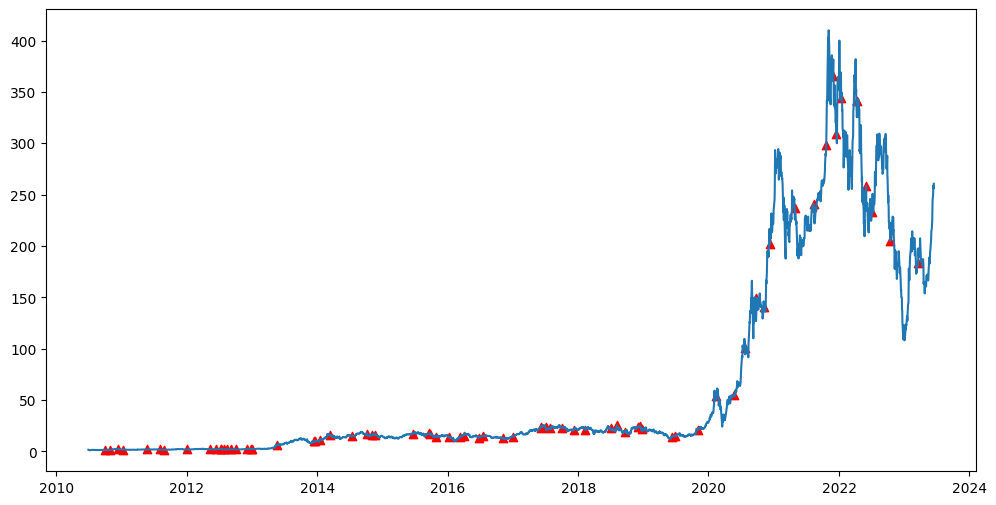

The ascending triangle indices of META are 
 DatetimeIndex(['2013-01-18', '2013-03-27', '2013-09-11', '2013-09-17',
               '2013-10-31', '2013-12-04', '2014-01-06', '2014-01-09',
               '2014-02-20', '2014-04-24', '2014-08-15', '2014-11-04',
               '2015-01-29', '2015-02-17', '2015-04-06', '2015-04-23',
               '2015-09-25', '2016-01-13', '2016-04-13', '2016-04-19',
               '2016-07-06', '2016-08-09', '2016-08-22', '2016-11-28',
               '2016-12-13', '2017-01-20', '2017-03-15', '2017-03-21',
               '2017-05-03', '2017-05-31', '2017-06-09', '2017-08-29',
               '2018-04-23', '2018-05-23', '2018-05-29', '2018-07-17',
               '2019-01-02', '2019-04-15', '2019-07-12', '2019-07-24',
               '2019-09-17', '2019-10-18', '2019-12-12', '2020-02-20',
               '2020-05-12', '2020-07-13', '2020-07-20', '2020-10-06',
               '2020-12-07', '2020-12-28', '2021-01-28', '2021-08-27',
               '2021-10-26', '20

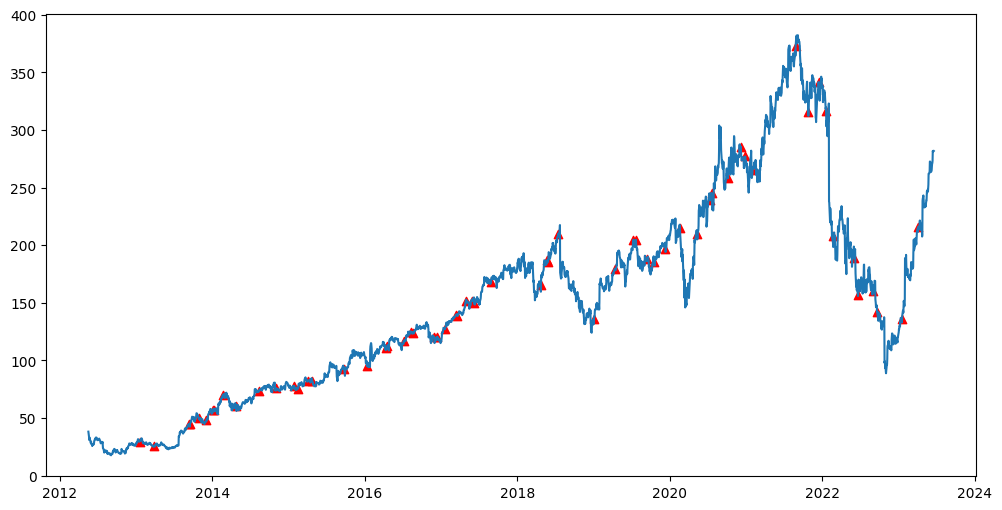

The ascending triangle indices of NFLX are 
 DatetimeIndex(['2010-01-20', '2010-02-22', '2010-02-25', '2010-03-22',
               '2010-04-01', '2010-09-20', '2011-01-03', '2011-03-10',
               '2011-04-06', '2011-05-23', '2011-06-06', '2011-07-11',
               '2011-10-10', '2012-02-06', '2012-02-21', '2012-08-10',
               '2012-12-04', '2013-05-28', '2013-08-05', '2013-09-23',
               '2013-10-22', '2013-12-04', '2014-02-13', '2014-02-24',
               '2014-04-10', '2014-05-06', '2014-09-12', '2014-10-08',
               '2015-04-06', '2015-06-19', '2015-07-07', '2015-09-24',
               '2015-10-08', '2015-12-07', '2016-01-06', '2016-04-12',
               '2016-08-01', '2017-01-24', '2017-02-13', '2017-02-23',
               '2017-03-21', '2017-03-27', '2017-04-10', '2017-04-18',
               '2017-05-04', '2017-07-27', '2017-08-24', '2017-08-29',
               '2018-01-10', '2018-03-02', '2018-03-27', '2018-07-11',
               '2018-07-27', '20

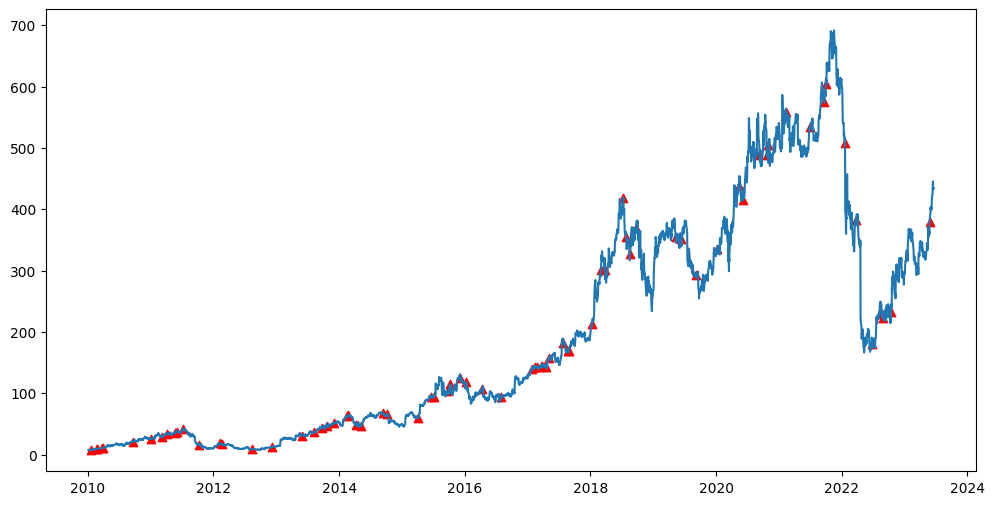

The ascending triangle indices of NVDA are 
 DatetimeIndex(['2010-01-21', '2010-01-28', '2010-11-11', '2010-12-27',
               '2011-02-11', '2011-06-23', '2011-10-13', '2011-11-11',
               '2011-11-21', '2012-04-19', '2012-05-23', '2012-07-17',
               '2012-09-25', '2012-12-04', '2013-02-04', '2013-02-13',
               '2013-02-14', '2013-02-20', '2013-04-05', '2013-04-11',
               '2013-05-22', '2013-05-30', '2013-07-25', '2013-09-03',
               '2013-10-03', '2013-12-26', '2014-02-03', '2014-03-06',
               '2014-03-13', '2014-03-26', '2014-05-01', '2014-05-06',
               '2014-06-02', '2014-08-07', '2014-11-07', '2014-11-14',
               '2014-12-08', '2015-03-02', '2015-03-18', '2015-04-23',
               '2015-09-24', '2015-10-21', '2015-11-23', '2015-12-09',
               '2015-12-17', '2016-01-26', '2016-04-22', '2016-05-12',
               '2016-07-05', '2016-07-22', '2016-07-29', '2017-02-10',
               '2017-06-05', '20

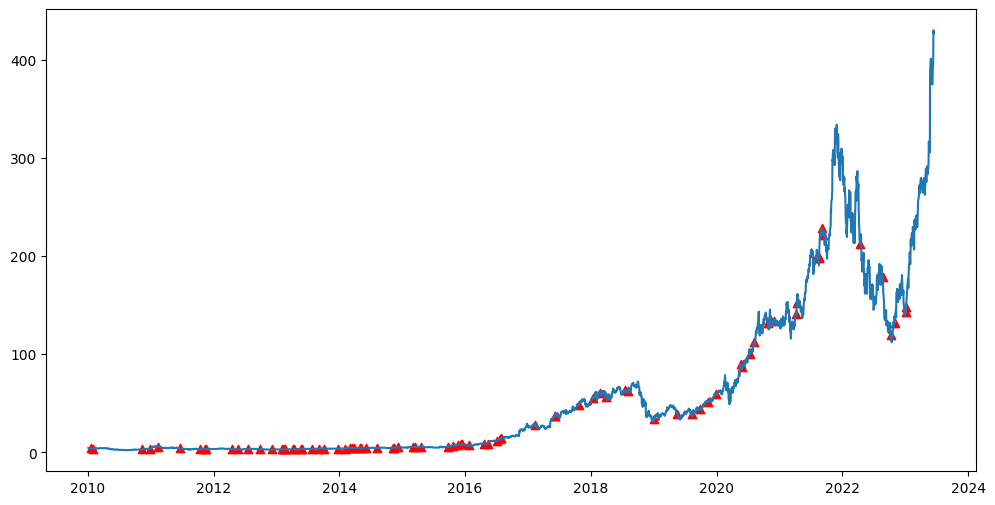

The ascending triangle indices of BABA are 
 DatetimeIndex(['2014-12-15', '2015-02-12', '2015-06-08', '2015-07-22',
               '2015-09-15', '2015-10-02', '2016-01-27', '2016-01-28',
               '2016-03-10', '2016-07-18', '2016-09-19', '2016-10-07',
               '2016-11-02', '2017-02-06', '2017-03-21', '2017-04-07',
               '2018-01-16', '2018-07-17', '2018-08-23', '2019-07-29',
               '2019-08-01', '2020-05-29', '2020-06-19', '2020-07-31',
               '2020-08-17', '2020-10-26', '2021-10-22', '2022-09-28',
               '2022-11-17', '2023-02-23'],
              dtype='datetime64[ns]', name='Date', freq=None)


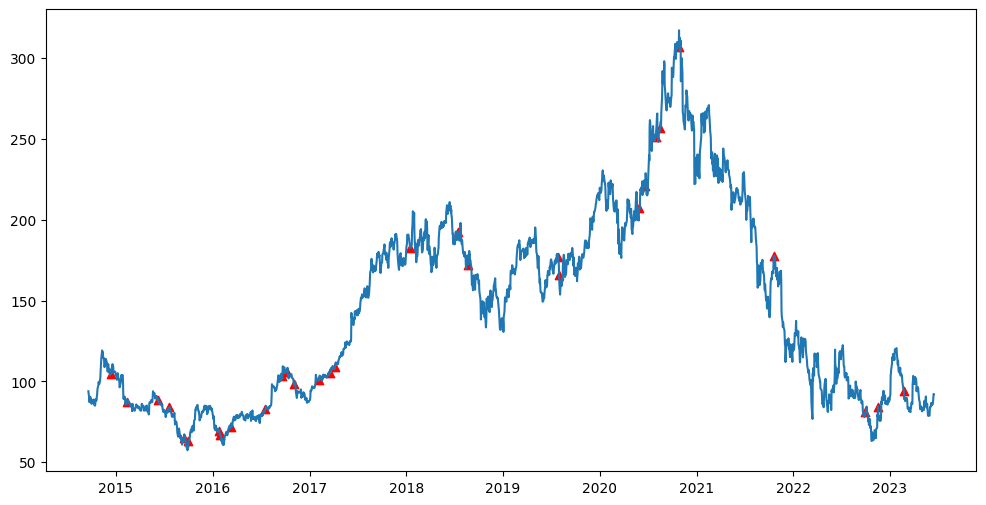

The ascending triangle indices of PYPL are 
 DatetimeIndex(['2015-11-23', '2016-01-13', '2016-02-24', '2016-03-10',
               '2016-03-16', '2016-04-25', '2016-06-14', '2016-12-15',
               '2017-01-26', '2017-02-24', '2017-05-05', '2017-06-09',
               '2017-07-27', '2017-08-02', '2017-10-10', '2017-12-15',
               '2018-01-24', '2018-02-14', '2018-03-27', '2018-05-02',
               '2018-07-23', '2018-09-04', '2018-12-19', '2019-01-02',
               '2019-02-20', '2019-07-19', '2019-09-24', '2019-09-27',
               '2019-12-02', '2020-02-11', '2020-02-13', '2020-05-26',
               '2020-06-04', '2020-07-23', '2020-10-09', '2020-12-21',
               '2021-01-04', '2021-01-25', '2021-06-16', '2021-09-08',
               '2021-10-20', '2021-11-12', '2021-12-01', '2021-12-28',
               '2022-01-04', '2022-02-10', '2022-03-14', '2022-08-26',
               '2022-12-28', '2023-01-18', '2023-02-23', '2023-03-02',
               '2023-06-14', '20

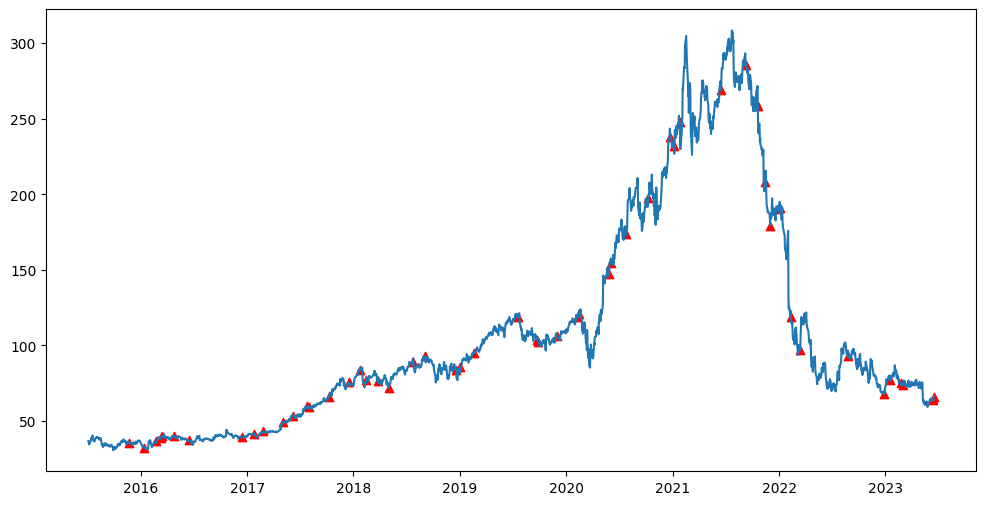

The ascending triangle indices of INTC are 
 DatetimeIndex(['2010-01-21', '2010-01-28', '2010-03-19', '2010-04-07',
               '2010-05-18', '2010-06-21', '2010-09-23', '2010-09-28',
               '2010-10-01', '2010-10-13', '2010-10-26', '2010-11-22',
               '2011-01-14', '2011-02-10', '2011-03-04', '2011-06-23',
               '2011-08-16', '2011-08-26', '2012-02-15', '2012-02-16',
               '2012-11-19', '2013-01-08', '2013-02-15', '2013-03-08',
               '2013-05-22', '2013-06-28', '2013-08-14', '2014-02-13',
               '2014-02-21', '2014-03-13', '2014-06-23', '2014-07-10',
               '2014-11-20', '2015-02-03', '2015-02-06', '2015-03-02',
               '2015-03-05', '2015-03-18', '2015-04-09', '2015-07-16',
               '2015-10-14', '2016-03-10', '2016-04-20', '2016-05-31',
               '2016-06-10', '2016-07-06', '2016-08-19', '2017-02-08',
               '2017-04-21', '2017-05-17', '2017-06-14', '2017-10-10',
               '2017-11-29', '20

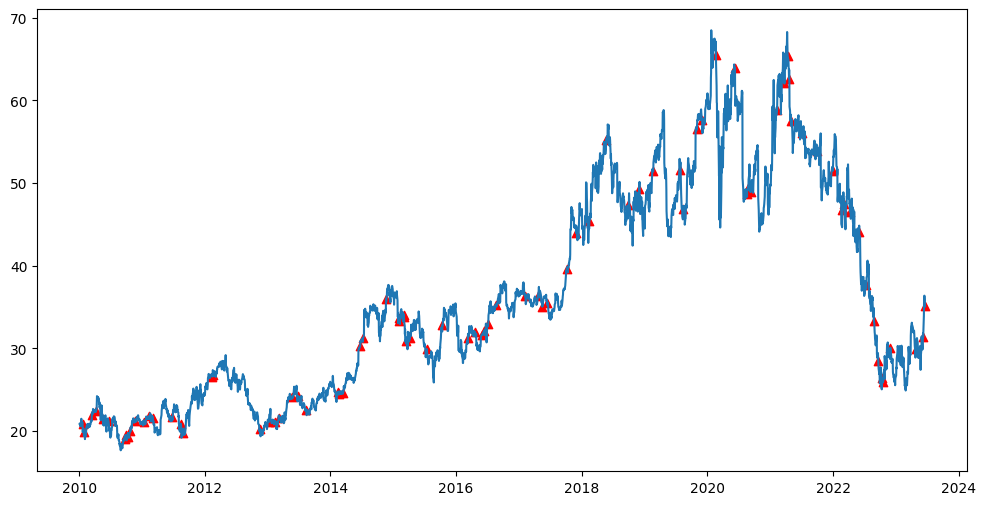

In [101]:
for i in range(len(Tickers)):
    index = ascending_triangle_pattern(stocks[i])
    print(f'The ascending triangle indices of {Tickers[i]} are \n',stocks[i].index[index])
    # Plotting the data
    plt.figure(figsize=(12,6))
    plt.plot(stocks[i]['Close'])
    plt.scatter(stocks[i].index[index], stocks[i]['Close'].iloc[index], marker='^', color='r')
    plt.show()


# Bear Flag

The bear flag indices of AAPL are 
 DatetimeIndex(['2010-01-14', '2010-02-19', '2010-03-31', '2010-05-07',
               '2010-06-24', '2010-07-16', '2010-07-26', '2010-08-05',
               '2010-08-13', '2010-10-01',
               ...
               '2022-02-07', '2022-05-16', '2022-08-01', '2022-08-18',
               '2022-10-31', '2023-02-06', '2023-02-08', '2023-04-20',
               '2023-05-08', '2023-05-15'],
              dtype='datetime64[ns]', name='Date', length=165, freq=None)


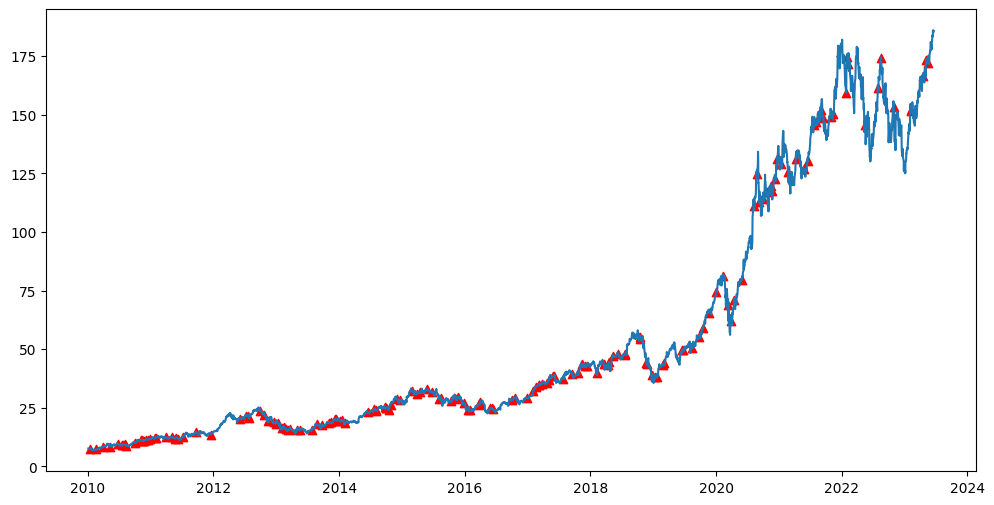

The bear flag indices of MSFT are 
 DatetimeIndex(['2010-02-10', '2010-02-19', '2010-03-18', '2010-03-24',
               '2010-06-16', '2010-07-09', '2010-08-03', '2010-08-30',
               '2010-09-29', '2010-10-14',
               ...
               '2023-04-03', '2023-04-10', '2023-04-14', '2023-04-20',
               '2023-05-01', '2023-05-03', '2023-05-08', '2023-05-09',
               '2023-05-12', '2023-05-19'],
              dtype='datetime64[ns]', name='Date', length=197, freq=None)


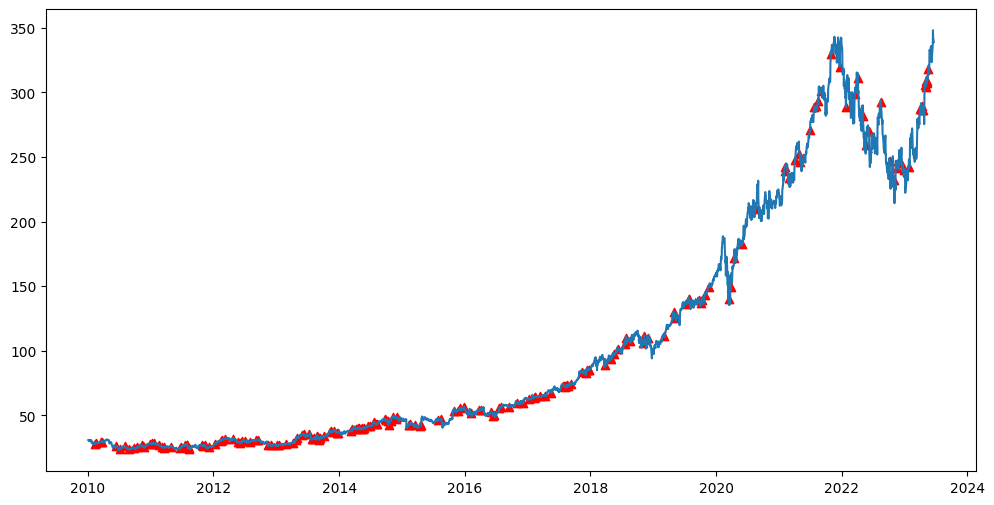

The bear flag indices of AMZN are 
 DatetimeIndex(['2010-01-11', '2010-01-15', '2010-02-02', '2010-02-12',
               '2010-03-09', '2010-05-07', '2010-05-24', '2010-06-09',
               '2010-06-18', '2010-06-22',
               ...
               '2022-07-08', '2022-08-02', '2022-08-05', '2022-10-06',
               '2022-11-07', '2022-11-14', '2022-11-25', '2022-12-09',
               '2022-12-27', '2023-03-17'],
              dtype='datetime64[ns]', name='Date', length=203, freq=None)


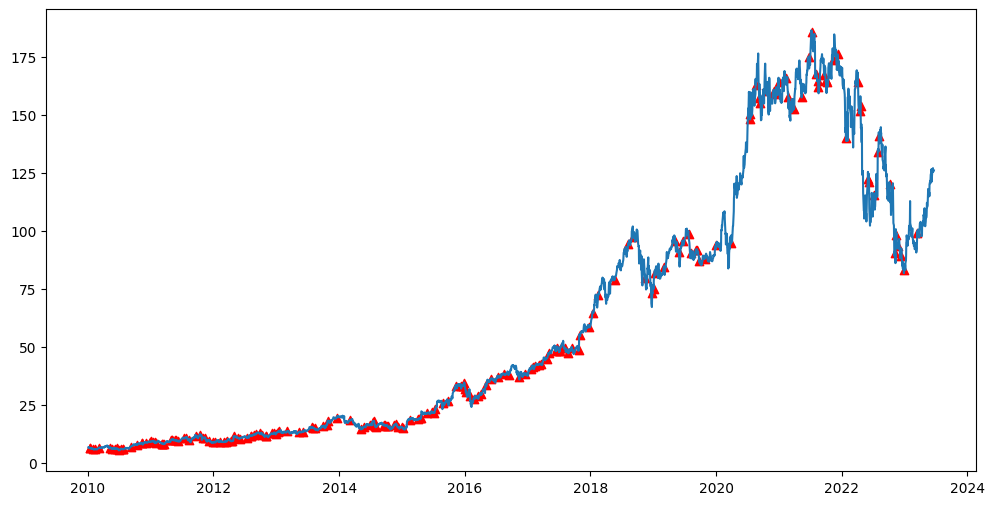

The bear flag indices of TSLA are 
 DatetimeIndex(['2010-10-07', '2010-10-22', '2010-10-27', '2010-11-05',
               '2010-11-11', '2010-11-17', '2011-02-04', '2011-03-21',
               '2011-04-01', '2011-04-25',
               ...
               '2022-04-08', '2022-04-14', '2022-08-18', '2022-10-06',
               '2022-11-14', '2023-01-30', '2023-04-14', '2023-04-18',
               '2023-04-25', '2023-05-01'],
              dtype='datetime64[ns]', name='Date', length=196, freq=None)


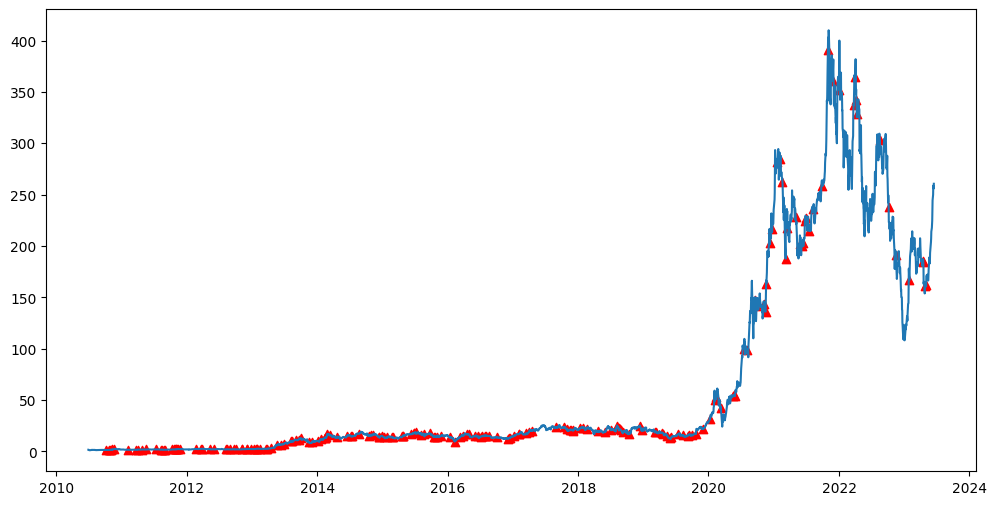

The bear flag indices of META are 
 DatetimeIndex(['2012-06-01', '2012-06-20', '2012-07-12', '2012-07-20',
               '2012-07-30', '2012-08-21', '2012-09-20', '2012-11-06',
               '2012-11-13', '2012-12-20',
               ...
               '2022-06-03', '2022-07-08', '2022-07-29', '2022-09-29',
               '2023-02-03', '2023-02-06', '2023-04-10', '2023-05-04',
               '2023-05-16', '2023-05-23'],
              dtype='datetime64[ns]', name='Date', length=165, freq=None)


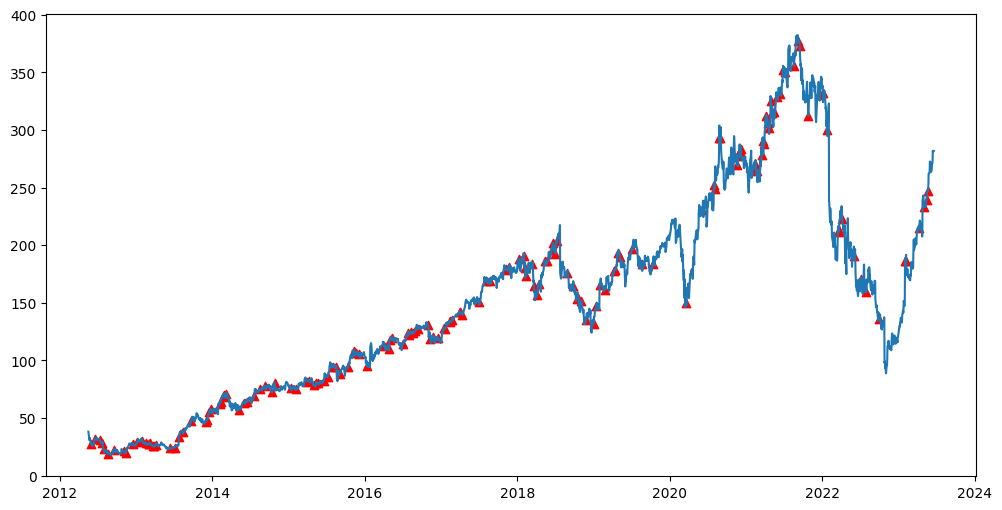

The bear flag indices of NFLX are 
 DatetimeIndex(['2010-01-11', '2010-02-12', '2010-02-23', '2010-03-18',
               '2010-03-24', '2010-04-23', '2010-04-27', '2010-05-07',
               '2010-06-24', '2010-07-15',
               ...
               '2022-11-16', '2022-11-25', '2022-12-22', '2022-12-23',
               '2023-01-11', '2023-02-06', '2023-02-24', '2023-04-10',
               '2023-05-19', '2023-06-02'],
              dtype='datetime64[ns]', name='Date', length=231, freq=None)


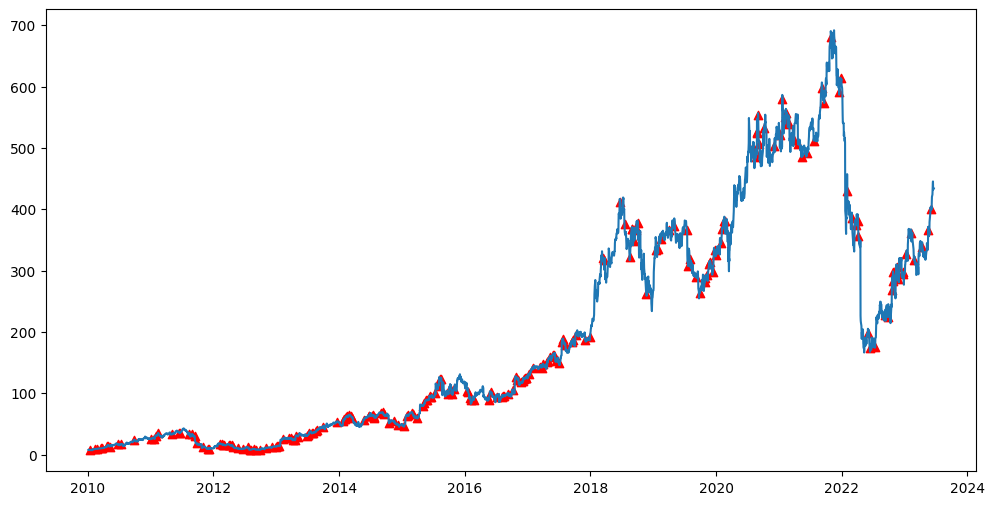

The bear flag indices of NVDA are 
 DatetimeIndex(['2010-01-14', '2010-01-20', '2010-02-09', '2010-02-19',
               '2010-03-08', '2010-04-23', '2010-05-07', '2010-05-24',
               '2010-06-16', '2010-08-30',
               ...
               '2022-10-12', '2022-10-31', '2022-11-25', '2022-12-23',
               '2023-02-03', '2023-02-15', '2023-03-27', '2023-05-02',
               '2023-05-09', '2023-05-19'],
              dtype='datetime64[ns]', name='Date', length=188, freq=None)


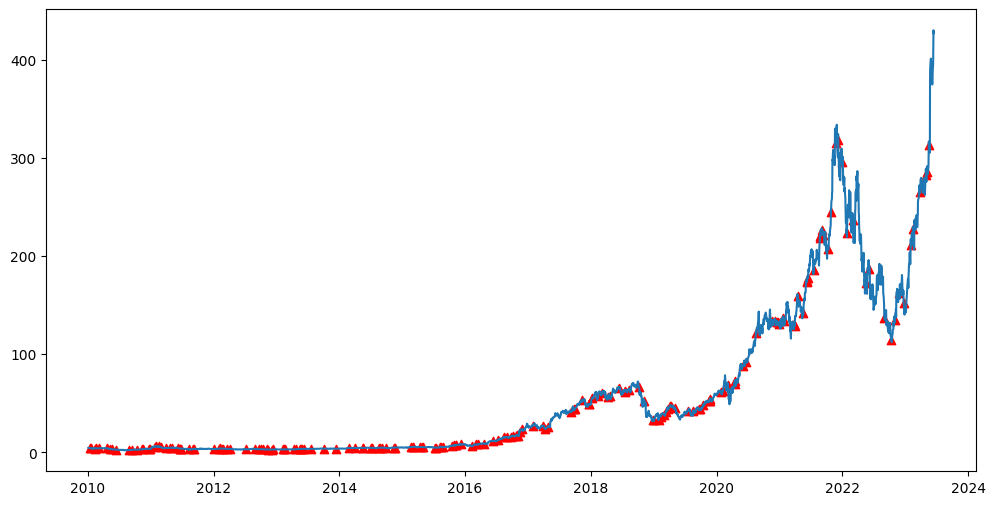

The bear flag indices of BABA are 
 DatetimeIndex(['2014-12-04', '2014-12-10', '2015-01-09', '2015-03-06',
               '2015-03-12', '2015-03-20', '2015-04-06', '2015-05-04',
               '2015-06-22', '2015-07-08',
               ...
               '2022-12-30', '2023-01-17', '2023-02-15', '2023-03-03',
               '2023-03-07', '2023-03-31', '2023-04-05', '2023-04-10',
               '2023-04-26', '2023-06-07'],
              dtype='datetime64[ns]', name='Date', length=115, freq=None)


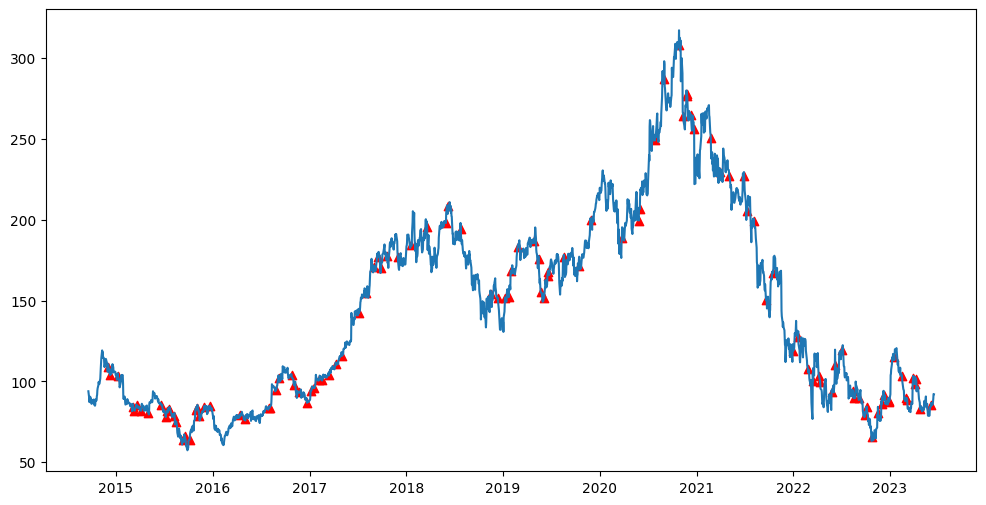

The bear flag indices of PYPL are 
 DatetimeIndex(['2015-08-13', '2015-09-24', '2015-11-19', '2015-12-07',
               '2015-12-09', '2015-12-16', '2015-12-24', '2016-03-15',
               '2016-03-28', '2016-04-04',
               ...
               '2023-01-05', '2023-01-13', '2023-02-03', '2023-02-16',
               '2023-04-03', '2023-04-04', '2023-04-10', '2023-04-12',
               '2023-05-18', '2023-06-13'],
              dtype='datetime64[ns]', name='Date', length=124, freq=None)


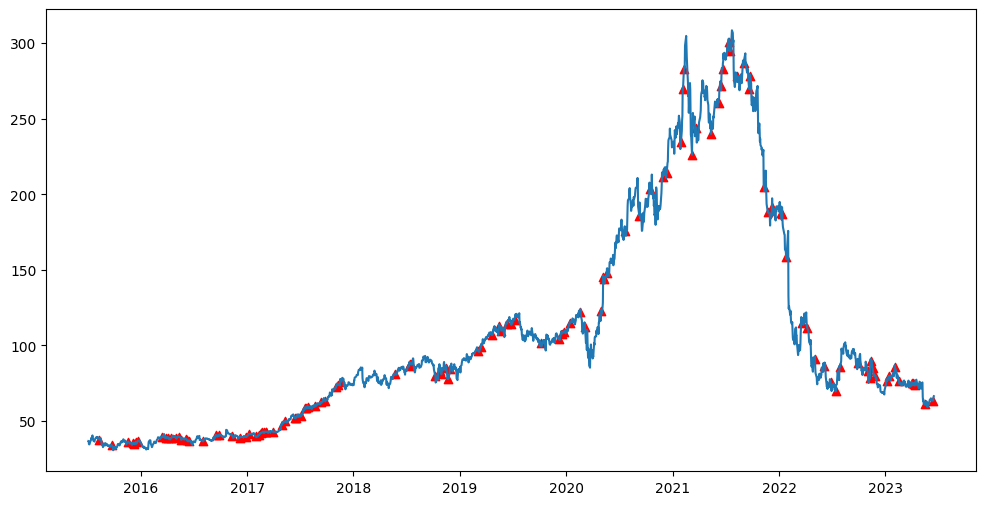

The bear flag indices of INTC are 
 DatetimeIndex(['2010-01-06', '2010-03-31', '2010-05-07', '2010-05-28',
               '2010-07-21', '2010-08-05', '2010-08-13', '2010-08-30',
               '2010-09-15', '2010-09-22',
               ...
               '2023-01-05', '2023-01-13', '2023-01-24', '2023-03-13',
               '2023-03-22', '2023-03-27', '2023-04-14', '2023-04-18',
               '2023-05-05', '2023-06-01'],
              dtype='datetime64[ns]', name='Date', length=175, freq=None)


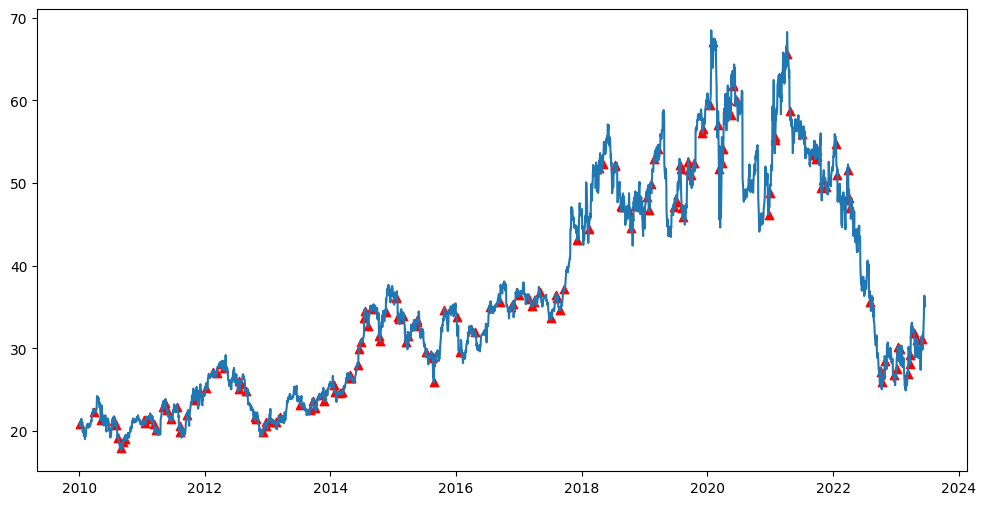

In [102]:
for i in range(len(Tickers)):
    index = bear_flag(stocks[i])
    print(f'The bear flag indices of {Tickers[i]} are \n',stocks[i].index[index])
    # Plotting the data
    plt.figure(figsize=(12,6))
    plt.plot(stocks[i]['Close'])
    plt.scatter(stocks[i].index[index], stocks[i]['Close'].iloc[index], marker='^', color='r')
    plt.show()

# Cup and Handle

The cup & handle indices of AAPL are 
 [ 283  329  393  452  570  684 1000 1173 1234 1292 1336 1394 1715 1852
 1930 1977 2024 2060 2120 2203 2409 2544 2684 2712 2784 2841 2939 3021
 3080]


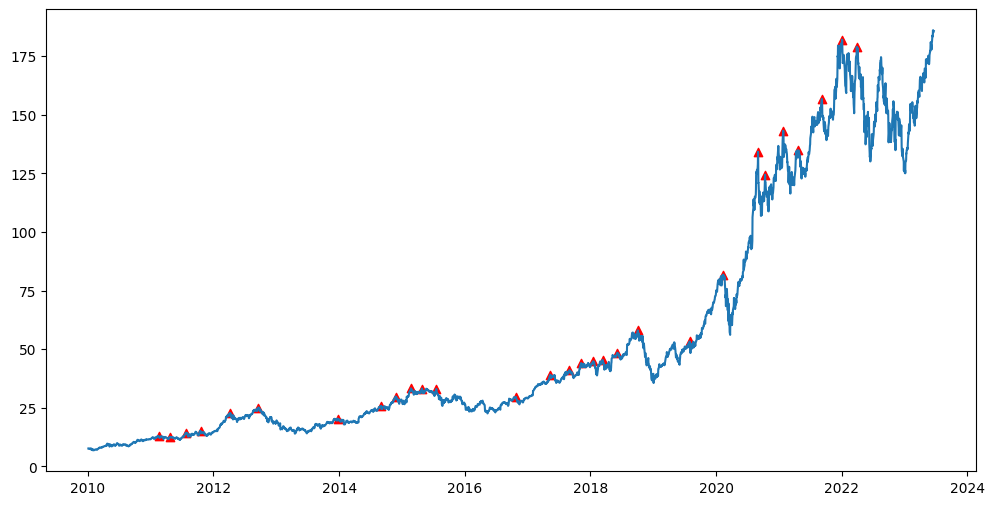

The cup & handle indices of MSFT are 
 [ 269  554  621  685  888  916  987 1067 1186 1225 1406 1507 1582 1612
 1663 1779 1868 1899 2060 2120 2154 2201 2245 2345 2406 2542 2685 2731
 2797 2847 2992]


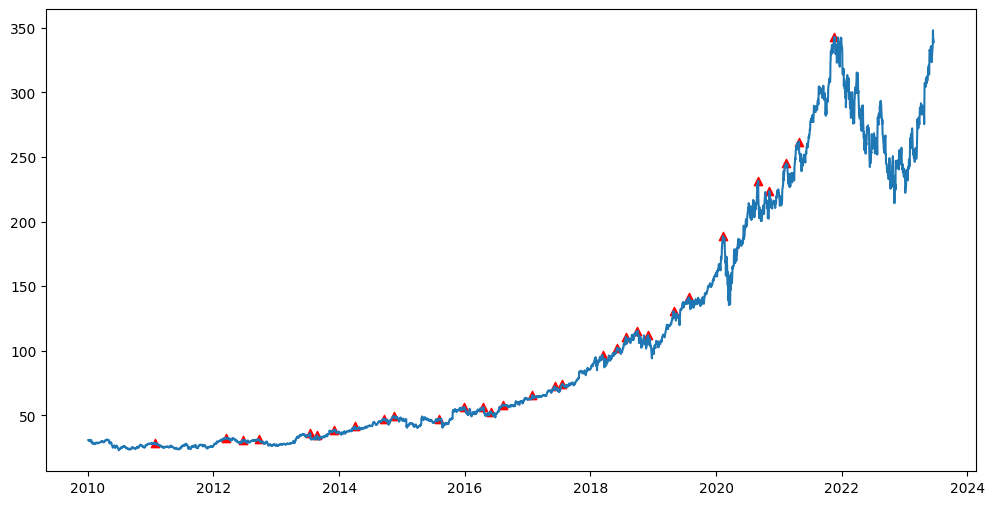

The cup & handle indices of AMZN are 
 [ 262  342  395  450  684  770  832  896 1018 1057 1300 1335 1406 1507
 1701 1867 1903 1989 2060 2182 2245 2348 2397 2548 2685 2713 2789 2849
 2897 2940 2991]


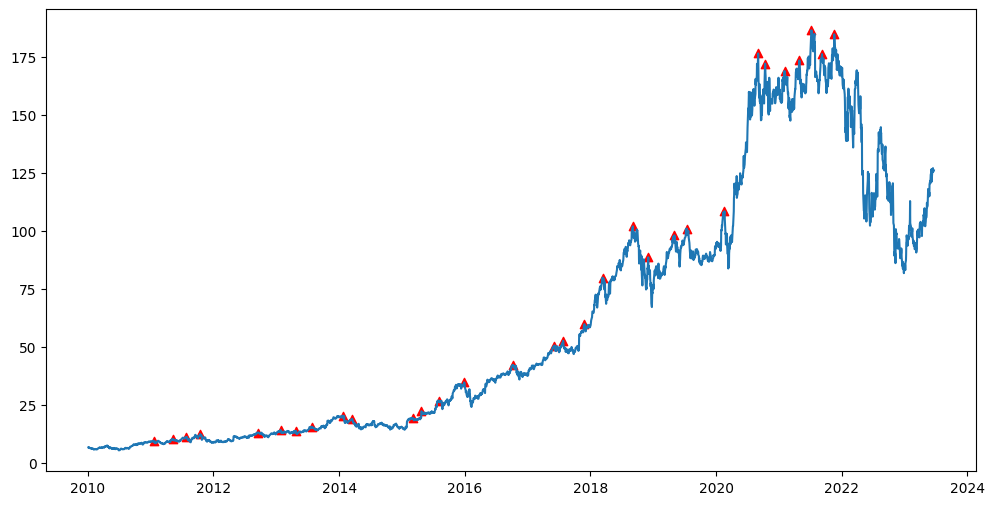

The cup & handle indices of TSLA are 
 [ 232  351  445  657  819  925 1007 1053 1104 1272 1316 1496 1532 1669
 1759 1790 1818 2041 2130 2426 2561 2592 2662 2715 2859 2899 2962]


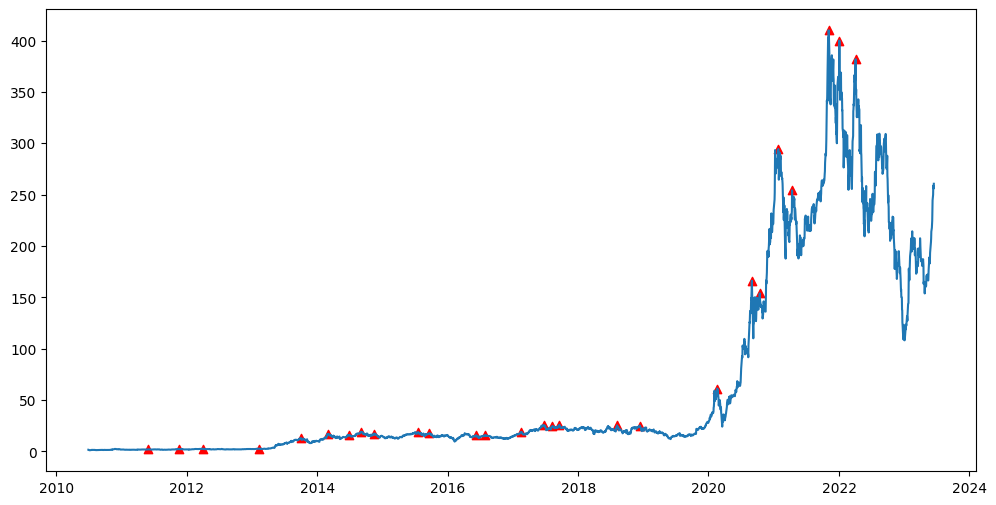

The cup & handle indices of META are 
 [ 238  356  452  614  652  714  796  876  930  999 1082 1115 1306 1390
 1435 1555 1749 1797 1935 2081 2131 2185 2340 2389]


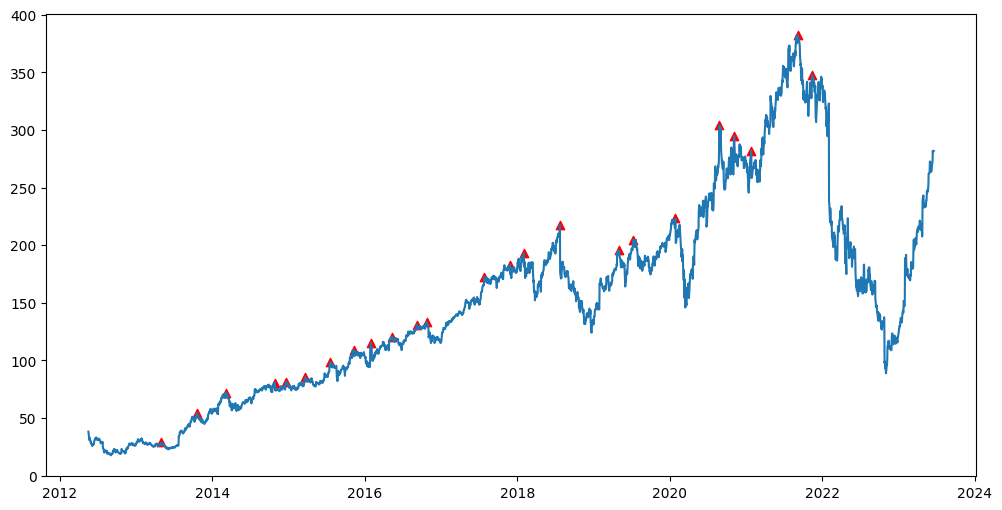

The cup & handle indices of NFLX are 
 [ 229  281  384  786  846  956 1047 1130 1179 1407 1451 1491 1713 1870
 1903 1960 2059 2085 2142 2201 2348 2390 2547 2609 2647 2684 2713 2780
 2835 2990 3252 3287 3334]


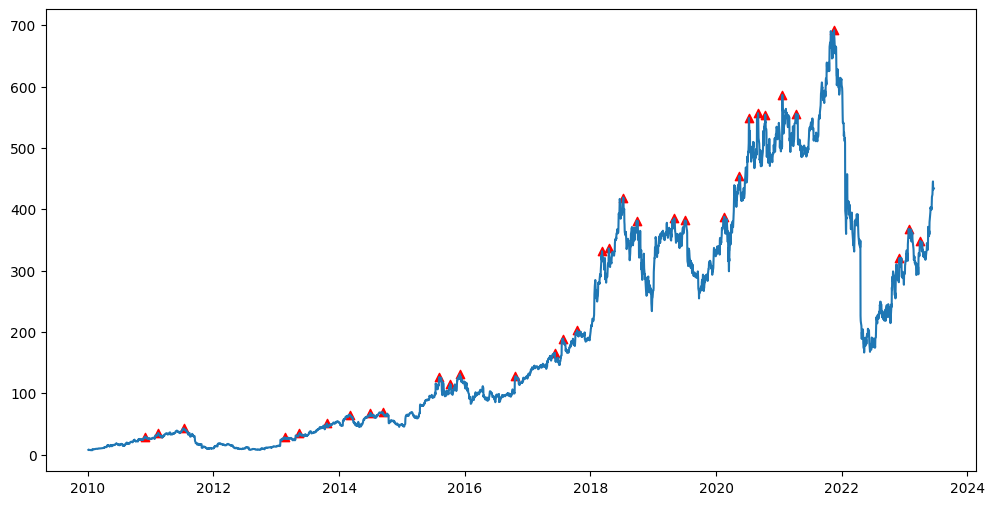

The cup & handle indices of NVDA are 
 [ 284  342  850  933  974 1041 1083 1120 1175 1238 1311 1491 1758 1786
 1911 1988 2064 2126 2201 2548 2685 2731 2798 2839 2895 2938 2997 3080]


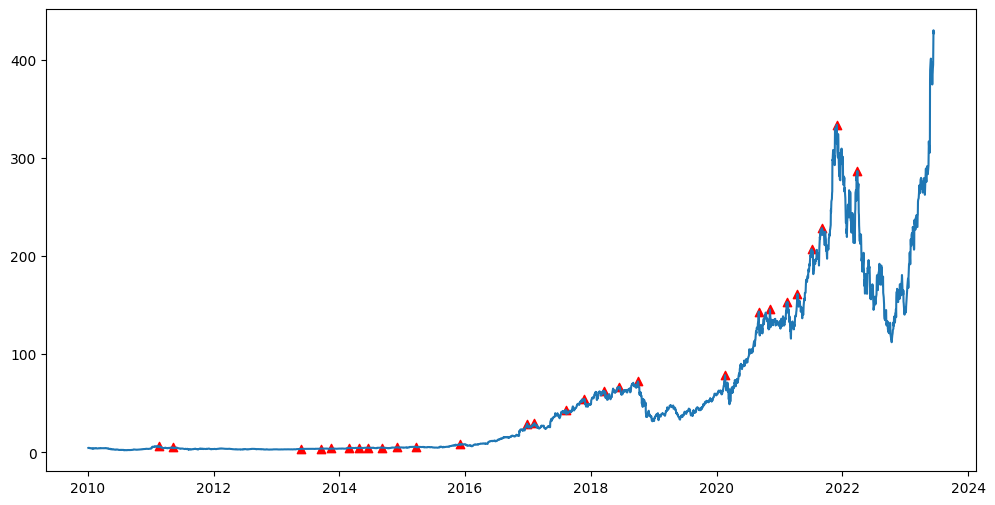

The cup & handle indices of BABA are 
 [ 426  506  802  844  878  940 1162 1220 1259 1337 1498 1537 2102 2146]


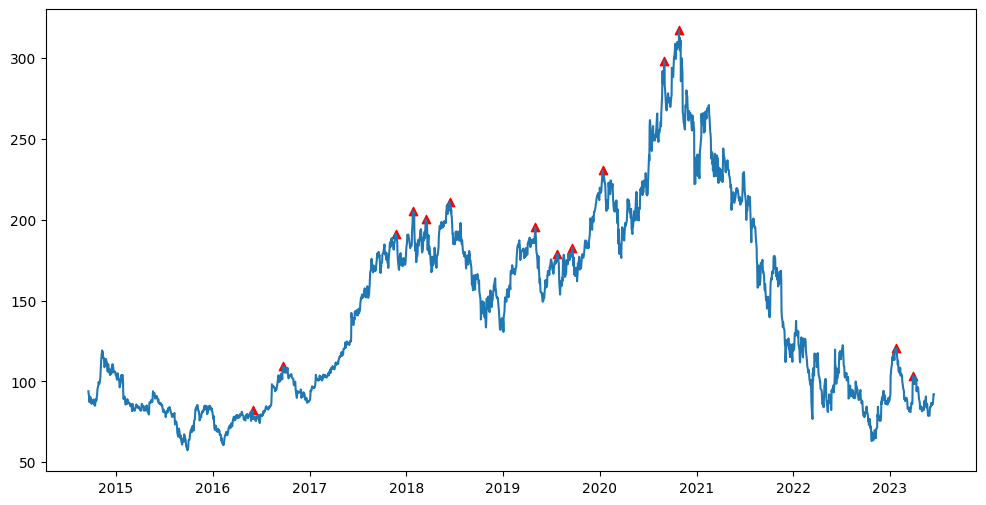

The cup & handle indices of PYPL are 
 [ 264  329  604  646  678  769  798  845 1020 1164 1301 1335 1414 1453
 1524 1555]


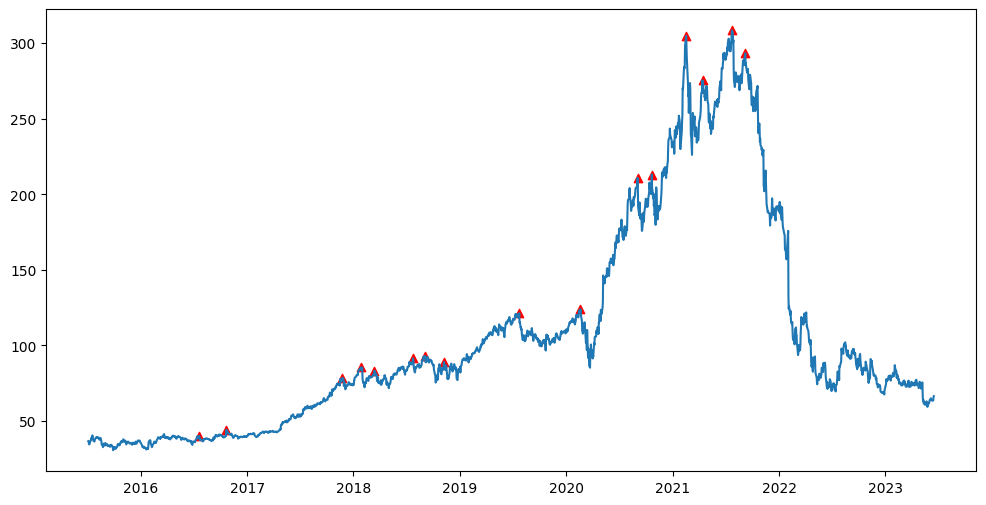

The cup & handle indices of INTC are 
 [ 285  346  380  587  621  869 1015 1079 1177 1240 1507 1703 1779 1973
 2030 2117 2339 2531 2623 2653 2835]


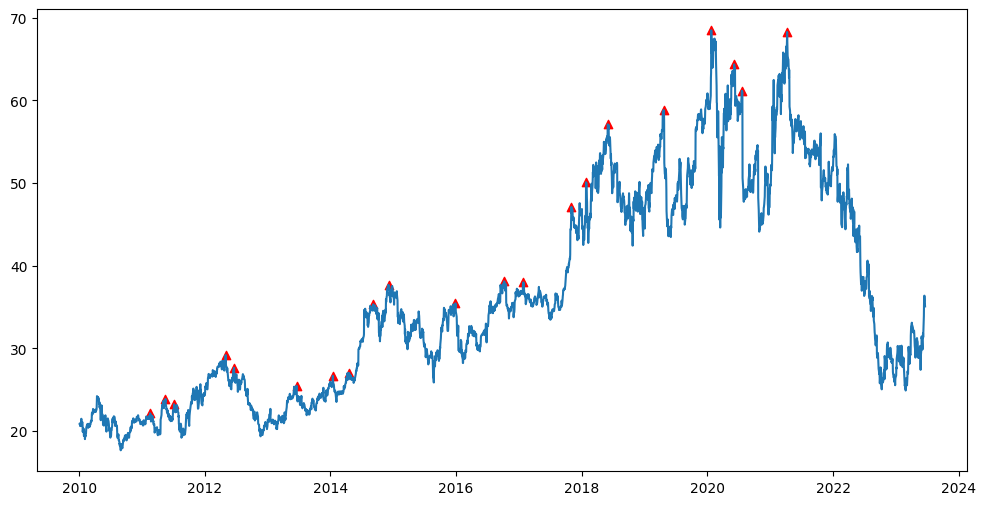

In [103]:
for i in range(len(Tickers)):
    index = cup_and_handle(stocks[i])
    print(f'The cup & handle indices of {Tickers[i]} are \n',index)
    # Plotting the data
    plt.figure(figsize=(12,6))
    plt.plot(stocks[i]['Close'])
    plt.scatter(stocks[i].index[index], stocks[i]['Close'].iloc[index], marker='^', color='r')
    plt.show()
    

# Rounding Top

The rounding top indices of AAPL are 
 DatetimeIndex(['2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19',
               '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25',
               '2010-02-26', '2010-03-01',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', name='Date', length=1668, freq=None)


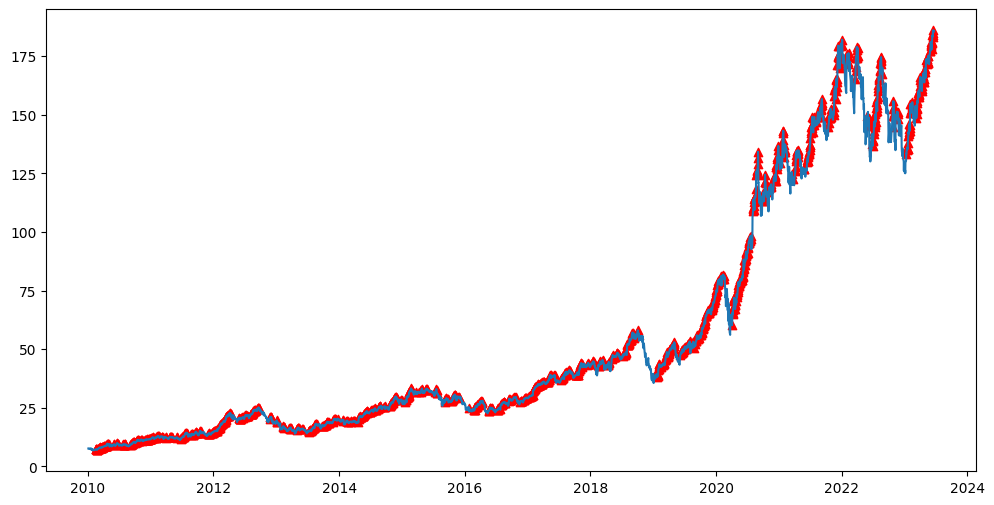

The rounding top indices of MSFT are 
 DatetimeIndex(['2010-02-18', '2010-02-19', '2010-02-22', '2010-02-23',
               '2010-02-24', '2010-02-25', '2010-02-26', '2010-03-01',
               '2010-03-10', '2010-03-11',
               ...
               '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-05',
               '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', name='Date', length=1593, freq=None)


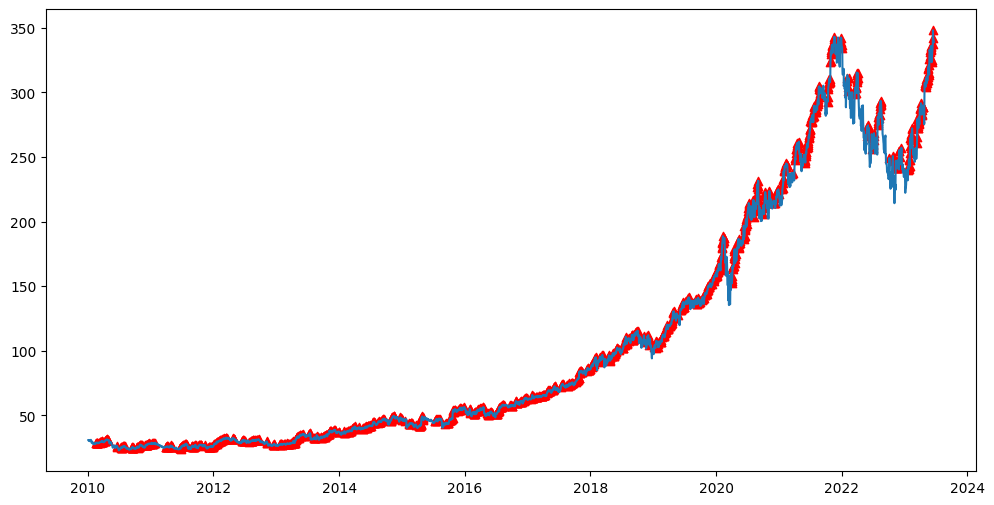

The rounding top indices of AMZN are 
 DatetimeIndex(['2010-02-22', '2010-02-23', '2010-02-24', '2010-03-02',
               '2010-03-03', '2010-03-04', '2010-03-05', '2010-03-08',
               '2010-03-09', '2010-03-10',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', name='Date', length=1578, freq=None)


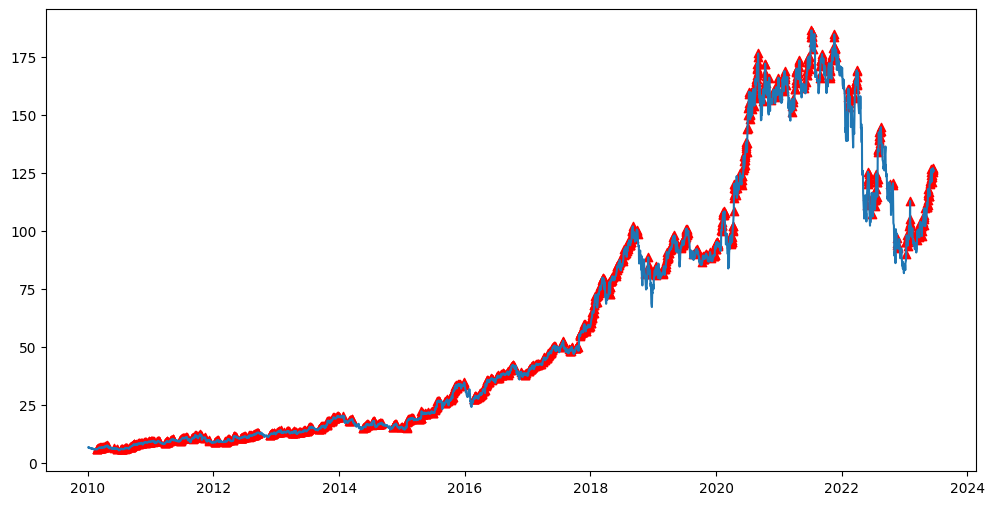

The rounding top indices of TSLA are 
 DatetimeIndex(['2010-07-20', '2010-07-21', '2010-07-22', '2010-07-23',
               '2010-07-26', '2010-07-27', '2010-07-28', '2010-08-24',
               '2010-08-25', '2010-08-26',
               ...
               '2023-06-02', '2023-06-05', '2023-06-06', '2023-06-07',
               '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15'],
              dtype='datetime64[ns]', name='Date', length=1423, freq=None)


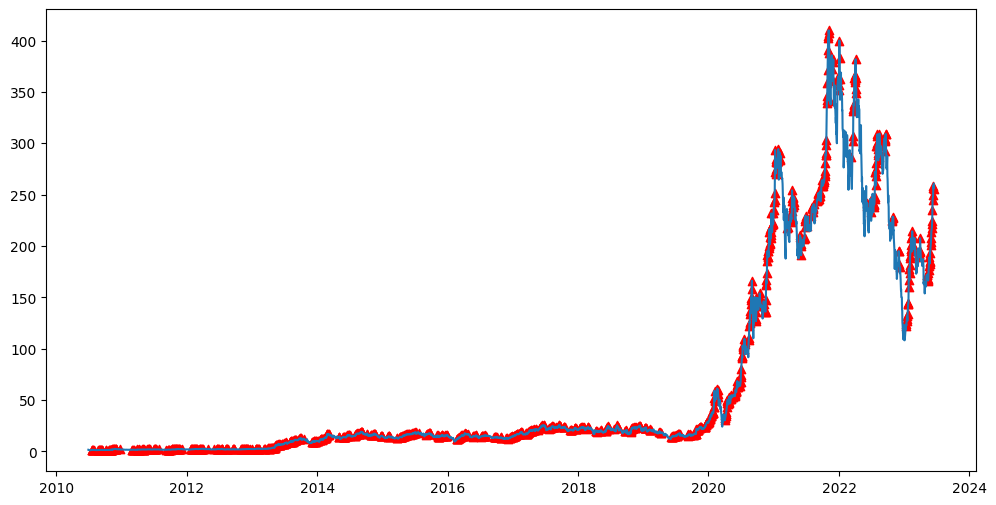

The rounding top indices of META are 
 DatetimeIndex(['2012-06-18', '2012-06-19', '2012-06-20', '2012-06-21',
               '2012-06-22', '2012-06-25', '2012-06-26', '2012-06-27',
               '2012-06-28', '2012-09-12',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', name='Date', length=1254, freq=None)


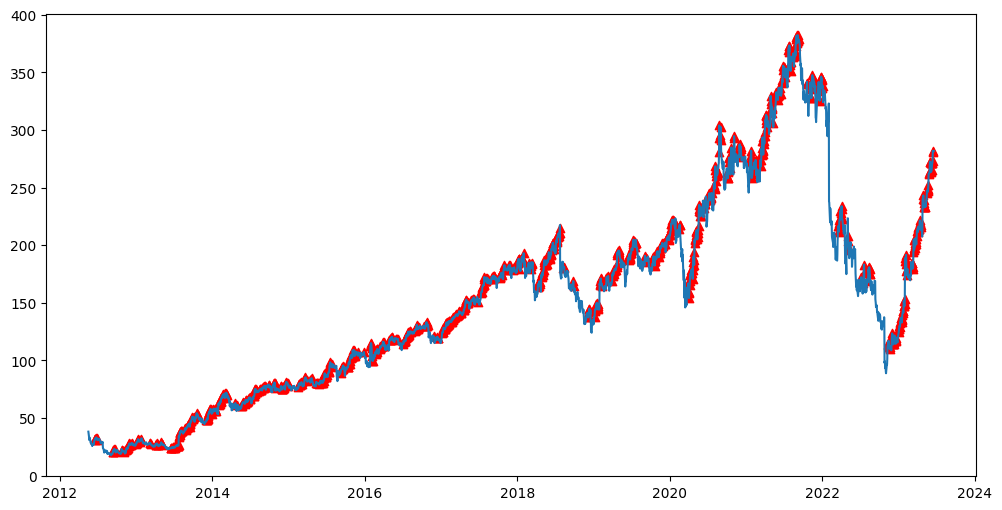

The rounding top indices of NFLX are 
 DatetimeIndex(['2010-01-29', '2010-02-01', '2010-02-02', '2010-02-03',
               '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09',
               '2010-02-10', '2010-02-11',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', name='Date', length=1557, freq=None)


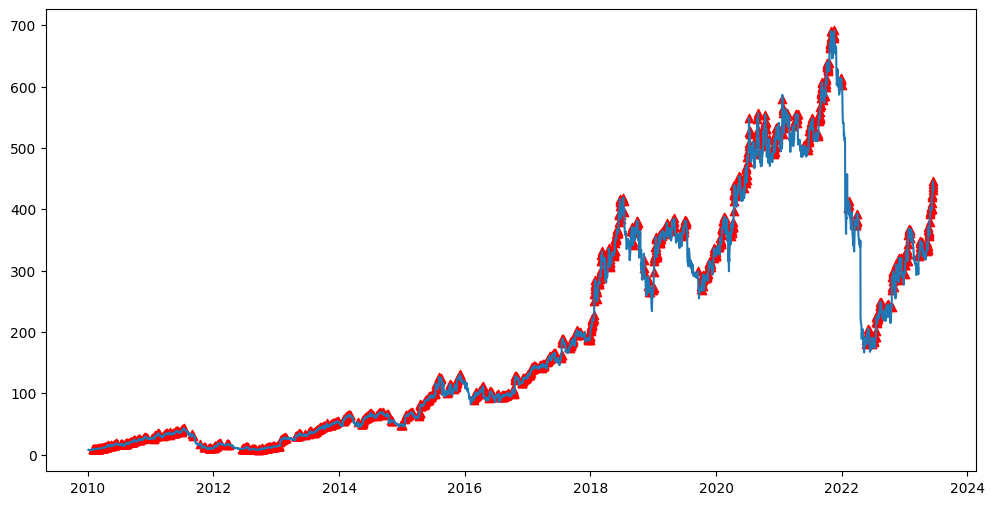

The rounding top indices of NVDA are 
 DatetimeIndex(['2010-02-12', '2010-02-16', '2010-02-22', '2010-02-23',
               '2010-02-24', '2010-03-08', '2010-03-09', '2010-03-10',
               '2010-03-11', '2010-03-12',
               ...
               '2023-06-02', '2023-06-05', '2023-06-06', '2023-06-07',
               '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15'],
              dtype='datetime64[ns]', name='Date', length=1555, freq=None)


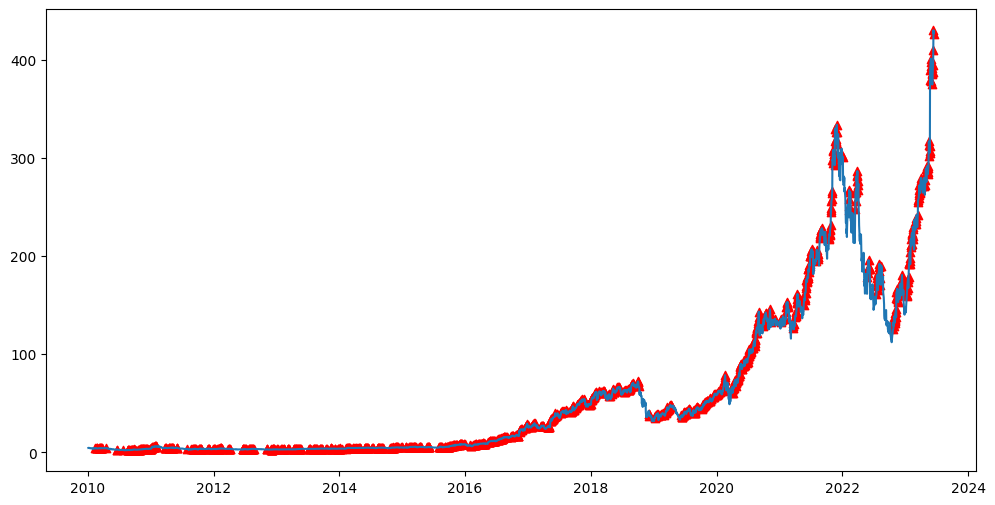

The rounding top indices of BABA are 
 DatetimeIndex(['2014-10-22', '2014-10-23', '2014-10-24', '2014-10-27',
               '2014-10-28', '2014-10-29', '2014-10-30', '2014-10-31',
               '2014-11-03', '2014-11-04',
               ...
               '2023-05-19', '2023-05-22', '2023-06-06', '2023-06-07',
               '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15'],
              dtype='datetime64[ns]', name='Date', length=858, freq=None)


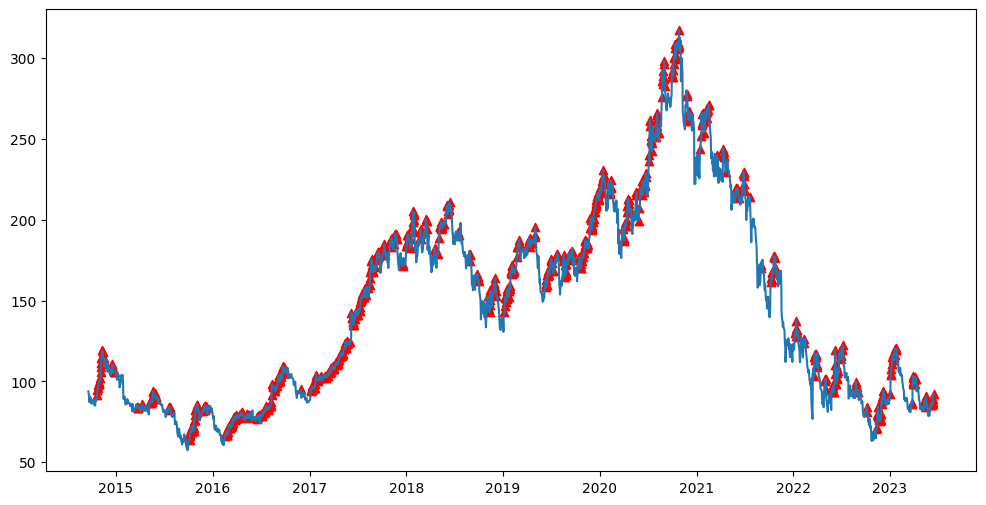

The rounding top indices of PYPL are 
 DatetimeIndex(['2015-07-21', '2015-07-22', '2015-07-23', '2015-08-06',
               '2015-08-07', '2015-08-10', '2015-08-11', '2015-09-08',
               '2015-09-09', '2015-10-13',
               ...
               '2023-06-02', '2023-06-05', '2023-06-06', '2023-06-07',
               '2023-06-08', '2023-06-09', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15'],
              dtype='datetime64[ns]', name='Date', length=909, freq=None)


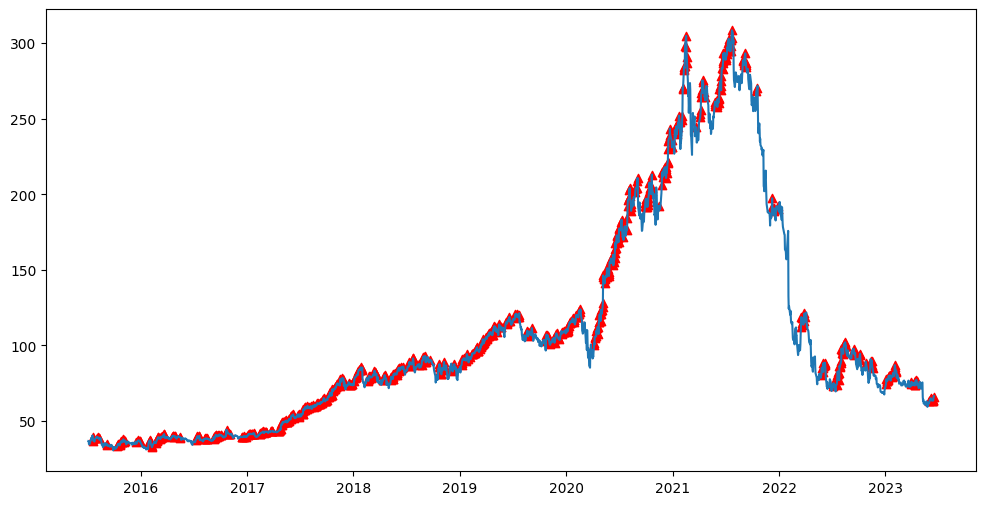

The rounding top indices of INTC are 
 DatetimeIndex(['2010-01-20', '2010-02-12', '2010-02-16', '2010-02-17',
               '2010-02-18', '2010-02-19', '2010-02-22', '2010-02-23',
               '2010-02-24', '2010-02-25',
               ...
               '2023-05-31', '2023-06-01', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', name='Date', length=1378, freq=None)


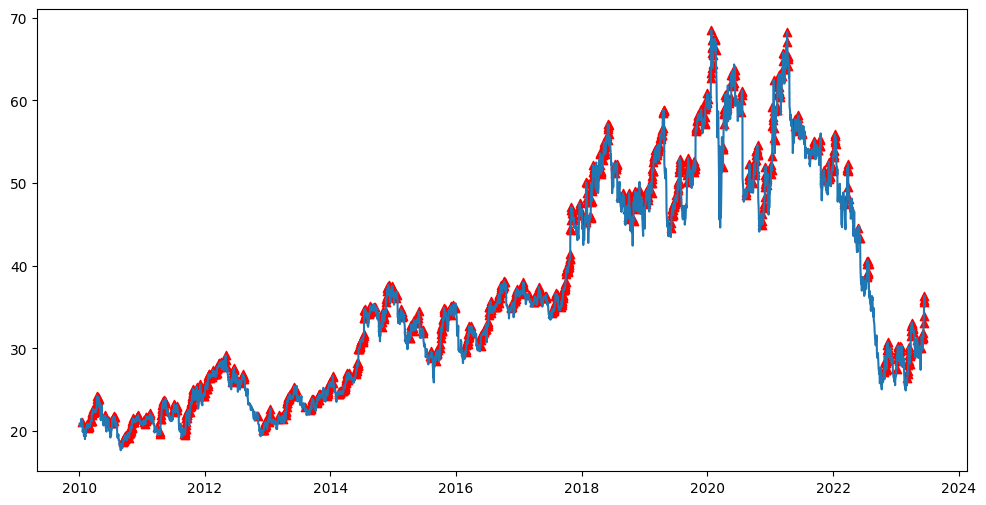

In [104]:
for i in range(len(Tickers)):
    index = rounding_top(stocks[i])
    print(f'The rounding top indices of {Tickers[i]} are \n',stocks[i].index[index])
    # Plotting the data
    plt.figure(figsize=(12,6))
    plt.plot(stocks[i]['Close'])
    plt.scatter(stocks[i].index[index], stocks[i]['Close'].iloc[index], marker='^', color='r')
    plt.show()

# Head And Shoulders

The head and shoulder indices of AAPL are 
 [ 235  237  516  665  667  731 1374 1833 2164 2294 2614 2971 2973]


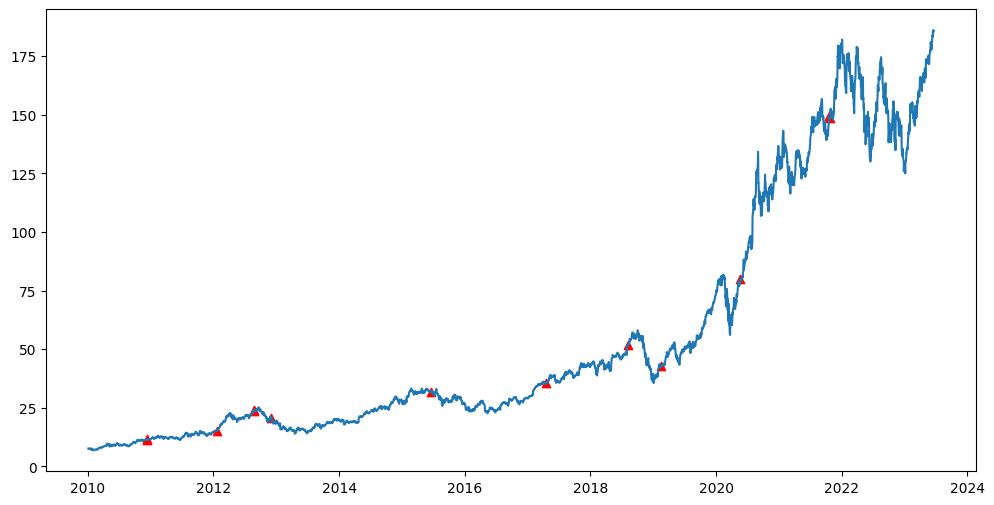

The head and shoulder indices of MSFT are 
 [ 784 1437 1439 1662 2746]


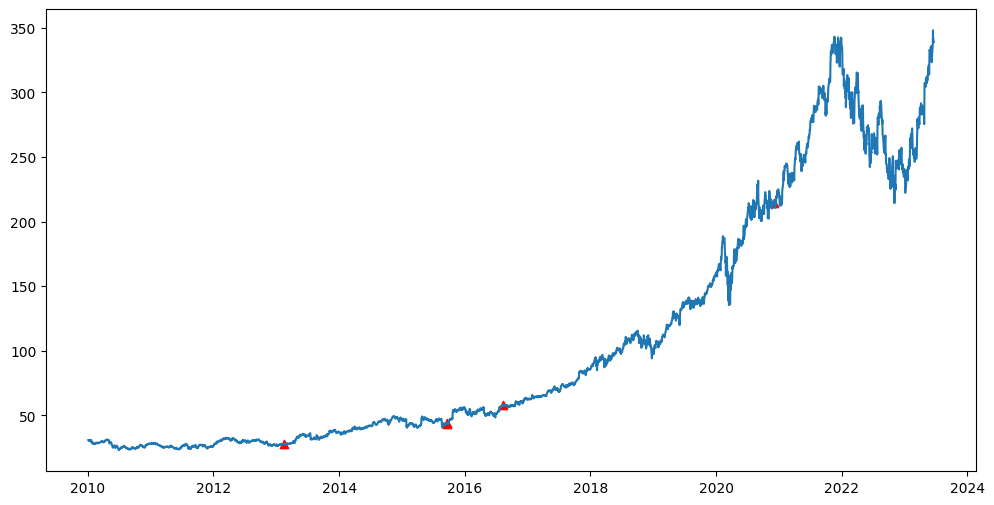

The head and shoulder indices of AMZN are 
 [ 936 1395 1660 2103 2345 2468 2571]


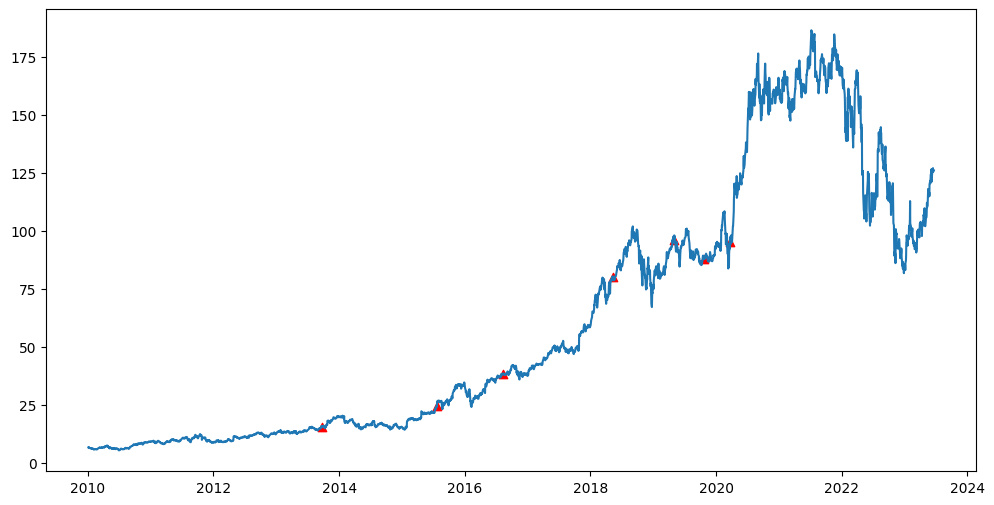

The head and shoulder indices of TSLA are 
 [ 312  480  503 1035 1753 2125 2209 2211]


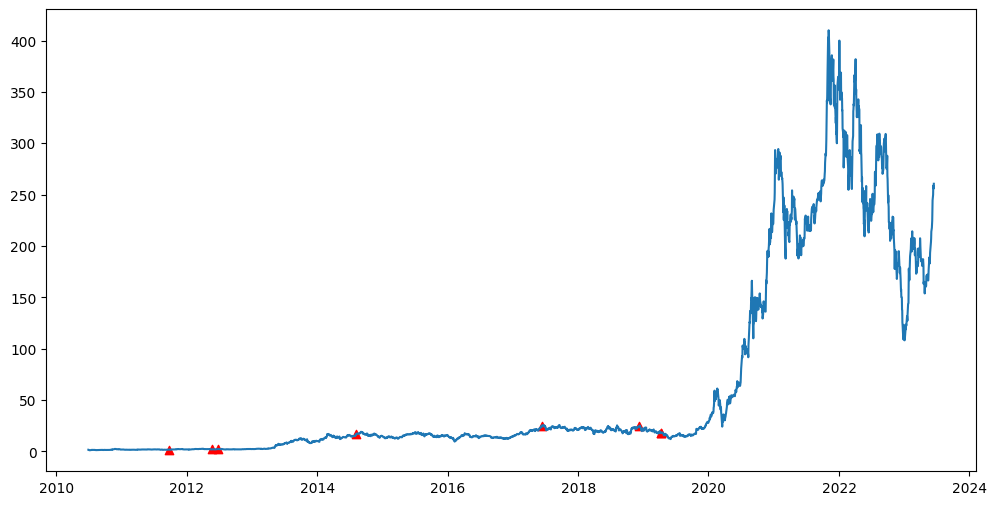

The head and shoulder indices of META are 
 [ 102 1014 1247 1249 2015]


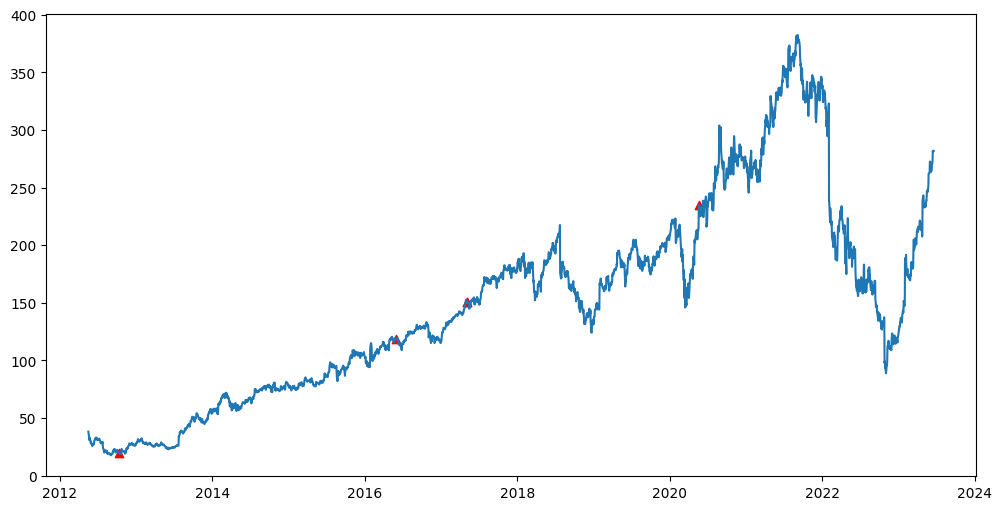

The head and shoulder indices of NFLX are 
 [ 667 1987 2136 2592 3188 3378]


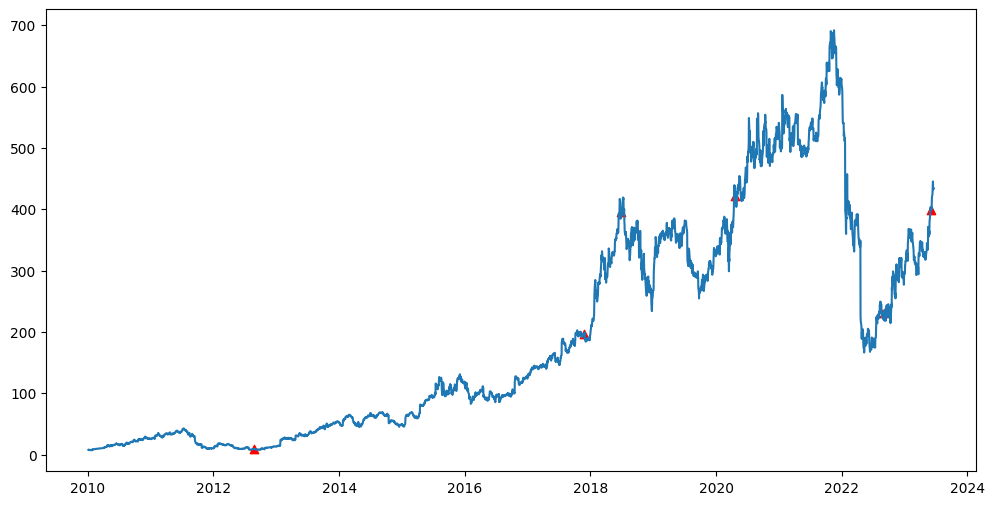

The head and shoulder indices of NVDA are 
 [ 301 1264 1819 2136 2294 2528 2530]


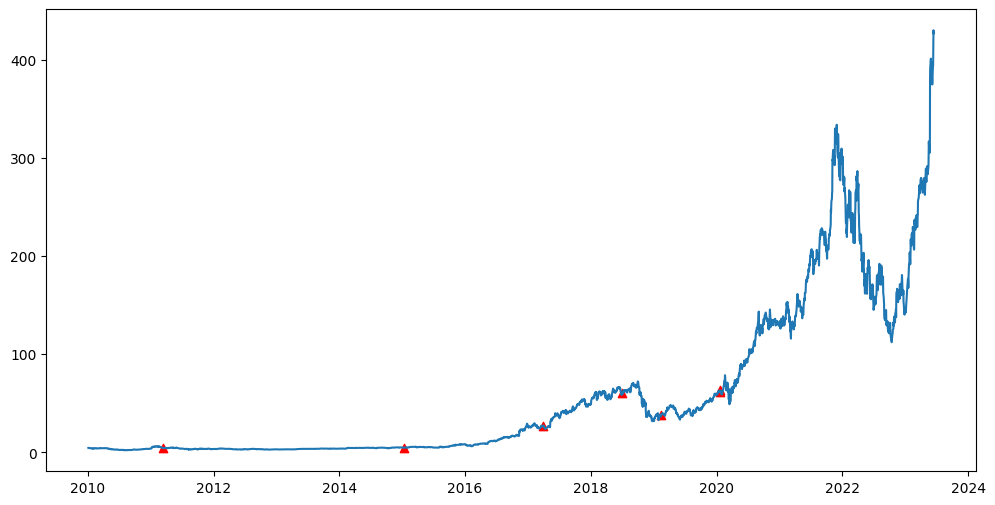

The head and shoulder indices of BABA are 
 [ 298  385  917  974  976  978 1540 1727]


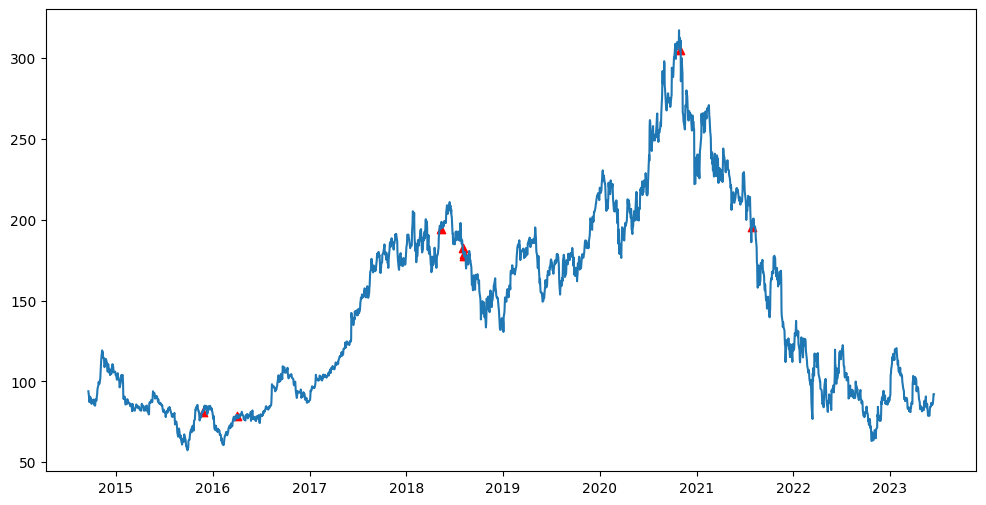

The head and shoulder indices of PYPL are 
 [1814]


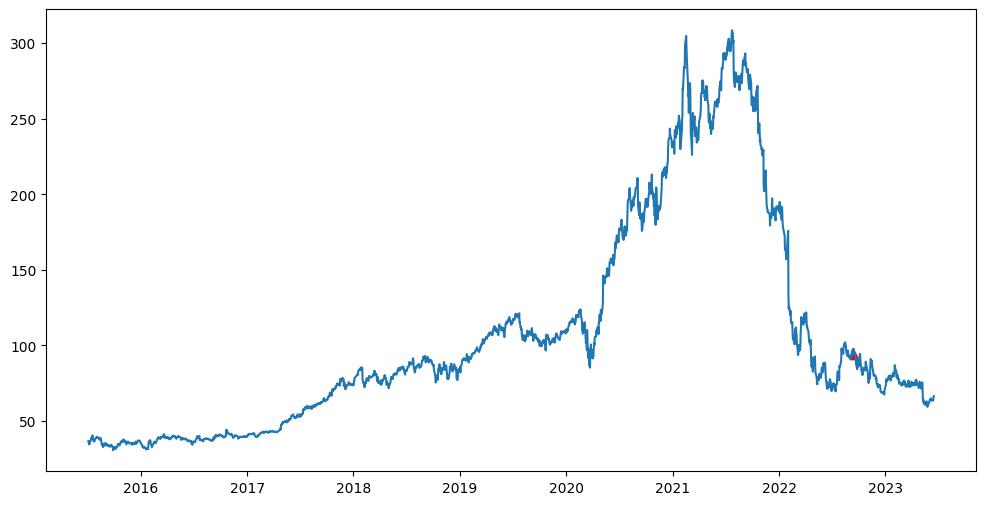

The head and shoulder indices of INTC are 
 [ 225  689 1044 1403 1769 2382 2913 3336]


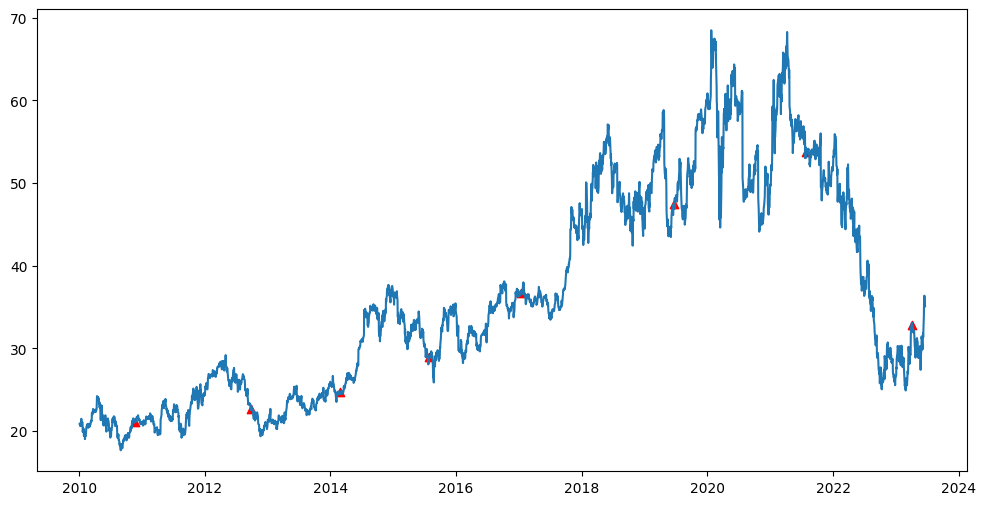

In [105]:
for i in range(len(Tickers)):
    index = head_and_shoulders(stocks[i])
    print(f'The head and shoulder indices of {Tickers[i]} are \n',index)
    # Plotting the data
    plt.figure(figsize=(12,6))
    plt.plot(stocks[i]['Close'])
    plt.scatter(stocks[i].index[index], stocks[i]['Close'].iloc[index], marker='^', color='r')
    plt.show()